In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
data=pd.read_csv('datasets\Employee_Compensation.csv')

In [3]:
data.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [4]:
data.isna().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 180
Union                      179
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [5]:
#dropping null values as it is less than 5%

In [6]:
data=data.dropna()

In [7]:
data.isna().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [8]:
#1. Identify the top-paying departments in terms of average total compensation 
#and determine the factors contributing to their higher compensation levels.

data.groupby('Department')['Total Compensation'].mean().sort_values(ascending=False)

Department
Law Library                       231382.226250
City Attorney                     200365.494137
Fire Department                   192875.039593
LLB Law Library                   187457.892778
Sheriff                           185456.646552
                                      ...      
HOM HOMELESSNESS SERVICES          36710.029815
HHP CleanPowerSF                   29308.076923
REG Elections                      20424.005438
Registrar                          20175.529131
GEN General City / Unallocated     15824.066880
Name: Total Compensation, Length: 111, dtype: float64

In [9]:
#Analysis of each column

In [10]:
numerical_column=data.select_dtypes(include=['int64','float64'])

In [11]:
categorical_column=data.select_dtypes(exclude=['int64','float64'])

In [12]:
numerical_column

Organization Group Code  Year  Union Code  Employee Identifier  \
0                             3  2019       790.0             37486688   
1                             3  2019       535.0             39646203   
2                             3  2019       535.0             37486043   
3                             3  2019       535.0             37615772   
4                             3  2019       535.0             37500212   
...                         ...   ...         ...                  ...   
840500                        2  2014         6.0                53853   
840501                        2  2013         6.0                53853   
840502                        2  2016         6.0                53853   
840503                        2  2015         6.0                53853   
840504                        2  2014         6.0                53853   

        Salaries  Overtime  Other Salaries  Total Salary  Retirement  \
0       60720.01      0.00            0.00      60720.01    13653.20   
1       91677.00      0.00            0.00      91677.00    17524.20   
2       89106.03      0.00         1540.00      90646.03    17327.20   
3       85581.11   3355.94          337.75      89274.80    16359.16   
4       86457.00      0.00         2090.00      88547.00    16925.97   
...          ...       ...             ...           ...         ...   
840500  93249.36   5158.03         1740.00     100147.39    20251.75   
840501  91338.06    955.10         1860.00      94153.16    16971.40   
840502      0.00      0.00         2133.90       2133.90        0.00   
840503  93580.00    593.51         1869.00      96042.51    19749.36   
840504  94305.09   2300.93         1560.00      98166.02    20949.96   

        Health and Dental  Other Benefits  Total Benefits  Total Compensation  
0                14733.76         4904.34        33291.30            94011.31  
1                14733.76         7411.13        39669.09           131346.09  
2                14733.76         7401.92        39462.88           130108.91  
3                14151.56         7096.21        37606.93           126881.73  
4                14733.76         7257.89        38917.62           127464.62  
...                   ...             ...             ...                 ...  
840500           12512.55         8233.87        40998.17           141145.56  
840501           12801.79         7872.93        37646.12           131799.28  
840502              98.16          163.24          261.40             2395.30  
840503           11946.64         7900.63        39596.63           135639.14  
840504           13054.94         8080.66        42085.56           140251.58  

[840318 rows x 13 columns]

In [13]:
categorical_column

Job Family Code Job Code Year Type  \
0                 1400     1404    Fiscal   
1                 9700     9703    Fiscal   
2                 2900     2918    Fiscal   
3                 2900     2918    Fiscal   
4                 2900     2905    Fiscal   
...                ...      ...       ...   
840500            7300     7345    Fiscal   
840501            7300     7345    Fiscal   
840502            7300     7345  Calendar   
840503            7300     7345  Calendar   
840504            7300     7345  Calendar   

                              Organization Group Department Code  \
0       Human Welfare & Neighborhood Development             HSA   
1       Human Welfare & Neighborhood Development             HSA   
2       Human Welfare & Neighborhood Development             HSA   
3       Human Welfare & Neighborhood Development             HSA   
4       Human Welfare & Neighborhood Development             HSA   
...                                          ...             ...   
840500   Public Works, Transportation & Commerce             AIR   
840501   Public Works, Transportation & Commerce             AIR   
840502   Public Works, Transportation & Commerce             AIR   
840503   Public Works, Transportation & Commerce             AIR   
840504   Public Works, Transportation & Commerce             AIR   

                    Department                        Union  \
0               Human Services       SEIU, Local 1021, Misc   
1               Human Services       SEIU, Local 1021, Misc   
2               Human Services       SEIU, Local 1021, Misc   
3               Human Services       SEIU, Local 1021, Misc   
4               Human Services       SEIU, Local 1021, Misc   
...                        ...                          ...   
840500  AIR Airport Commission  Electrical Workers, Local 6   
840501  AIR Airport Commission  Electrical Workers, Local 6   
840502  AIR Airport Commission  Electrical Workers, Local 6   
840503  AIR Airport Commission  Electrical Workers, Local 6   
840504  AIR Airport Commission  Electrical Workers, Local 6   

                           Job Family                         Job  
0       Clerical, Secretarial & Steno                       Clerk  
1               Community Development  HSA Emp & Training Spec II  
2                      Human Services           HSA Social Worker  
3                      Human Services           HSA Social Worker  
4                      Human Services   HSA Sr Eligibility Worker  
...                               ...                         ...  
840500               Journeyman Trade                 Electrician  
840501               Journeyman Trade                 Electrician  
840502               Journeyman Trade                 Electrician  
840503               Journeyman Trade                 Electrician  
840504               Journeyman Trade                 Electrician  

[840318 rows x 9 columns]

<Axes: xlabel='Union Code', ylabel='count'>

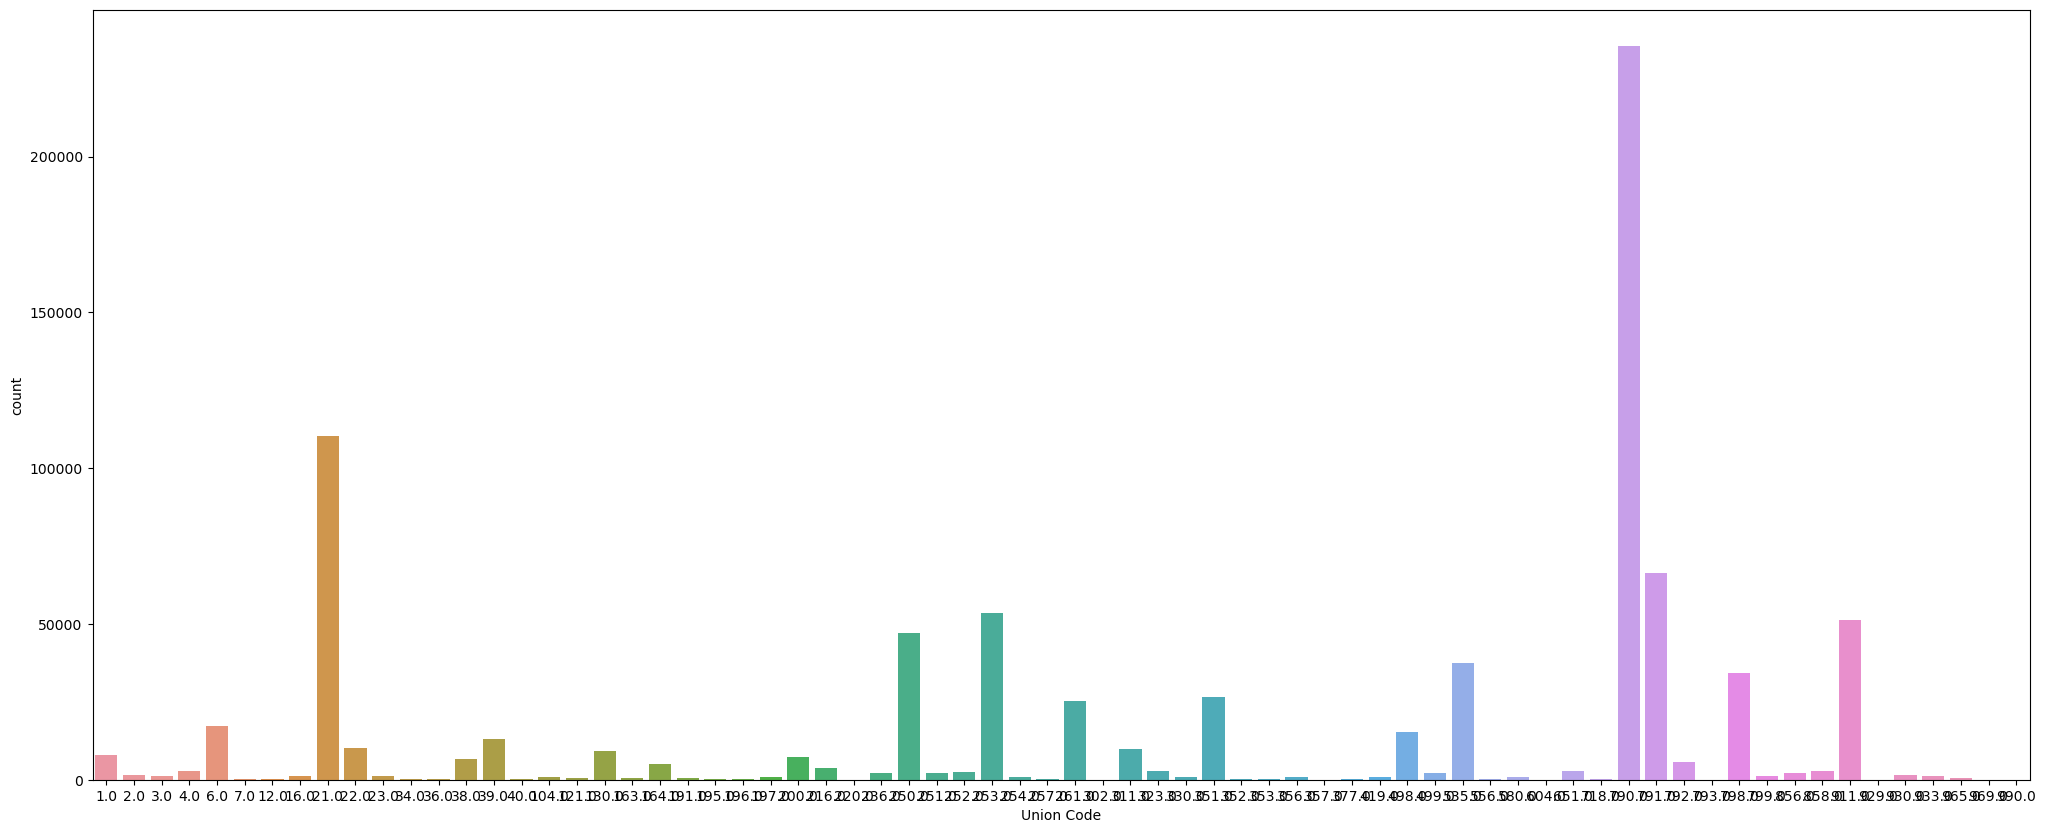

In [14]:
#union code
fig,ax=plt.subplots(figsize=(25,10))
sns.countplot(x=data['Union Code'])

In [15]:
data['Union Code'].value_counts()

790.0    235378
21.0     110477
791.0     66450
253.0     53477
911.0     51412
          ...  
220.0        42
357.0        26
969.0        22
302.0        21
604.0        11
Name: Union Code, Length: 70, dtype: int64

<Axes: xlabel='Total Compensation', ylabel='Count'>

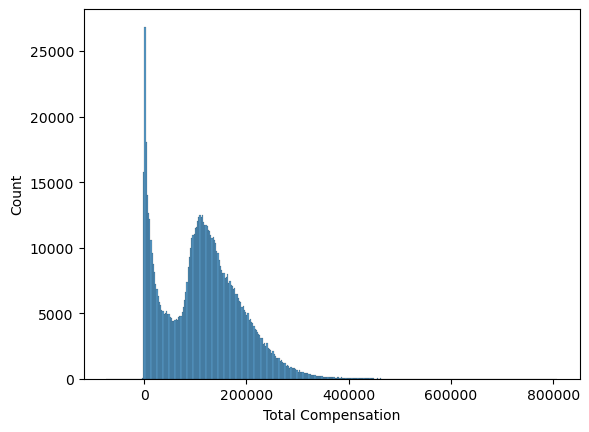

In [16]:
sns.histplot(x=data['Total Compensation'])

In [17]:
data['Total Compensation'].value_counts().sort_values(ascending=False)

268.74       111
250.00        82
1230.09       76
1288.83       70
1254.08       63
            ... 
92696.70       1
39081.58       1
135089.16      1
70638.81       1
140251.58      1
Name: Total Compensation, Length: 808311, dtype: int64

<Axes: xlabel='Union Code', ylabel='Total Compensation'>

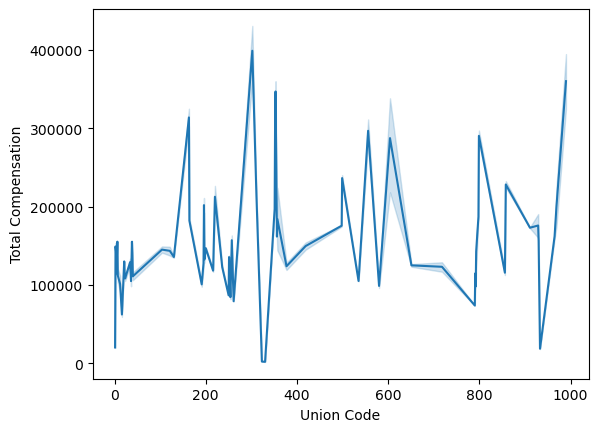

In [18]:
sns.lineplot(x=data['Union Code'] , y=data['Total Compensation'])

In [19]:
#Union code btw 250-300 has high compensation and between 350-400 has the least compensation ---->no relationship

In [20]:
#Salaries vs Total compensation

In [21]:
data['Salaries'].value_counts()

0.00         13319
135096.00      714
9463.59        496
66978.00       442
66041.00       411
             ...  
70529.10         1
35080.22         1
26015.04         1
65900.64         1
94305.09         1
Name: Salaries, Length: 613433, dtype: int64

<Axes: ylabel='Salaries'>

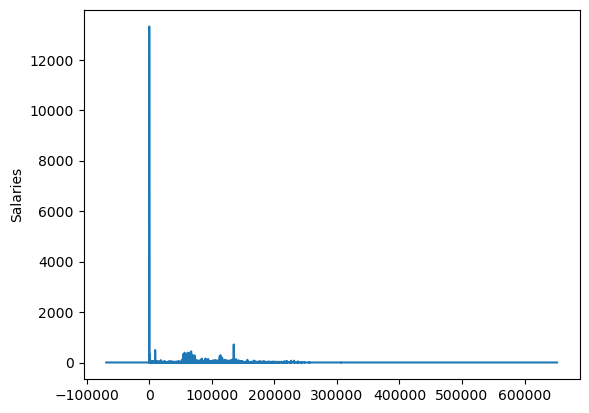

In [22]:
sns.lineplot(x=data['Salaries'].value_counts().index,y=data['Salaries'].value_counts())

In [23]:
data.Salaries= data.Salaries.abs()

<Axes: xlabel='Salaries', ylabel='Total Compensation'>

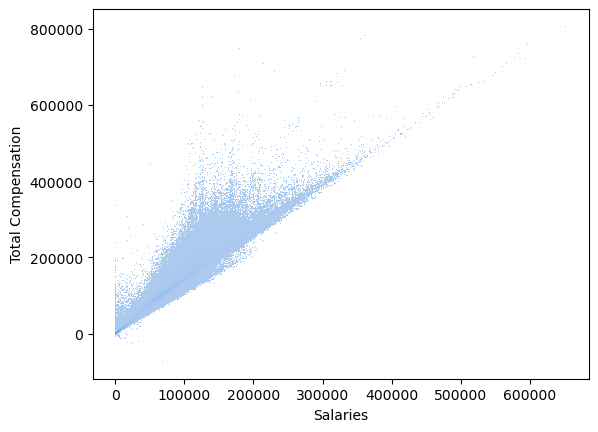

In [24]:
sns.histplot(x=data.Salaries,y=data['Total Compensation'])

<Axes: >

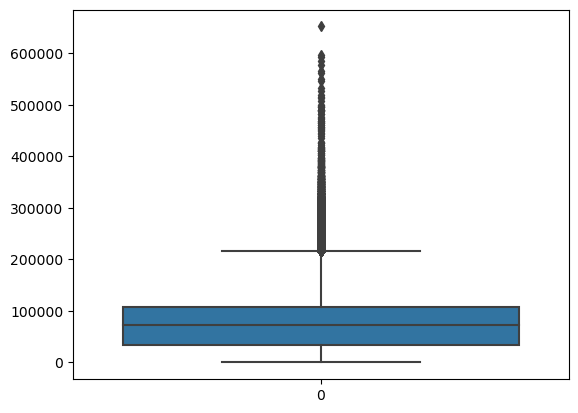

In [25]:
sns.boxplot(data.Salaries)

In [26]:
#as salaries increases , the total compensation also increases and btw 100000 to 200000 count is more 

In [27]:
# overtime vs total compensation

data.Overtime.value_counts()

0.00        436098
0.01           232
0.02           110
294.00          84
12.00           83
             ...  
2892.90          1
4945.60          1
18053.03         1
7977.53          1
2300.93          1
Name: Overtime, Length: 332083, dtype: int64

<Axes: xlabel='Overtime', ylabel='Count'>

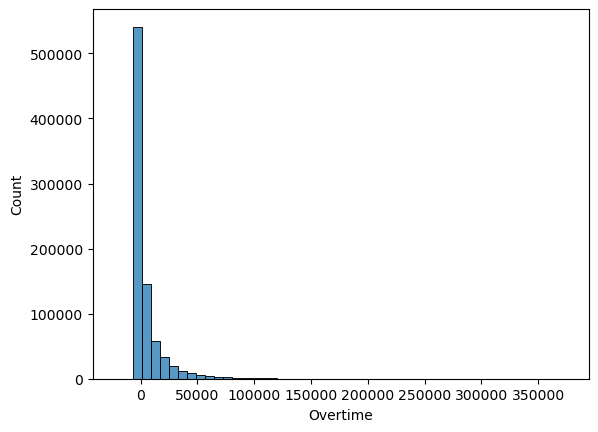

In [28]:
sns.histplot(data.Overtime,bins=50)

In [29]:
data.corr()

C:\Users\Futurense\AppData\Local\Temp\ipykernel_9132\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Organization Group Code      Year  Union Code  \
Organization Group Code                 1.000000  0.001975   -0.009197   
Year                                    0.001975  1.000000   -0.000499   
Union Code                             -0.009197 -0.000499    1.000000   
Employee Identifier                     0.003127  0.916597    0.001303   
Salaries                               -0.180280  0.199158   -0.110299   
Overtime                               -0.290362  0.102290    0.089384   
Other Salaries                         -0.220627  0.031000    0.138479   
Total Salary                           -0.255011  0.199084   -0.053259   
Retirement                             -0.225375  0.207039   -0.115132   
Health and Dental                      -0.205507  0.084061   -0.102316   
Other Benefits                          0.044183  0.163924   -0.343545   
Total Benefits                         -0.193758  0.183863   -0.171191   
Total Compensation                     -0.245372  0.199699   -0.083892   

                         Employee Identifier  Salaries  Overtime  \
Organization Group Code             0.003127 -0.180280 -0.290362   
Year                                0.916597  0.199158  0.102290   
Union Code                          0.001303 -0.110299  0.089384   
Employee Identifier                 1.000000  0.192350  0.096762   
Salaries                            0.192350  1.000000  0.254513   
Overtime                            0.096762  0.254513  1.000000   
Other Salaries                      0.016107  0.292723  0.349699   
Total Salary                        0.189959  0.952593  0.513025   
Retirement                          0.185639  0.922355  0.310215   
Health and Dental                   0.123706  0.660633  0.238659   
Other Benefits                      0.153906  0.738738  0.076013   
Total Benefits                      0.182378  0.916329  0.279255   
Total Compensation                  0.192280  0.964670  0.466026   

                         Other Salaries  Total Salary  Retirement  \
Organization Group Code       -0.220627     -0.255011   -0.225375   
Year                           0.031000      0.199084    0.207039   
Union Code                     0.138479     -0.053259   -0.115132   
Employee Identifier            0.016107      0.189959    0.185639   
Salaries                       0.292723      0.952593    0.922355   
Overtime                       0.349699      0.513025    0.310215   
Other Salaries                 1.000000      0.467519    0.325948   
Total Salary                   0.467519      1.000000    0.904887   
Retirement                     0.325948      0.904887    1.000000   
Health and Dental              0.164786      0.643270    0.667765   
Other Benefits                 0.069577      0.656447    0.654305   
Total Benefits                 0.262658      0.883718    0.948005   
Total Compensation             0.426730      0.993146    0.935730   

                         Health and Dental  Other Benefits  Total Benefits  \
Organization Group Code          -0.205507        0.044183       -0.193758   
Year                              0.084061        0.163924        0.183863   
Union Code                       -0.102316       -0.343545       -0.171191   
Employee Identifier               0.123706        0.153906        0.182378   
Salaries                          0.660633        0.738738        0.916329   
Overtime                          0.238659        0.076013        0.279255   
Other Salaries                    0.164786        0.069577        0.262658   
Total Salary                      0.643270        0.656447        0.883718   
Retirement                        0.667765        0.654305        0.948005   
Health and Dental                 1.000000        0.562348        0.843083   
Other Benefits                    0.562348        1.000000        0.776346   
Total Benefits                    0.843083        0.776346        1.000000   
Total Compensation                0.707442        0.70

<Axes: >

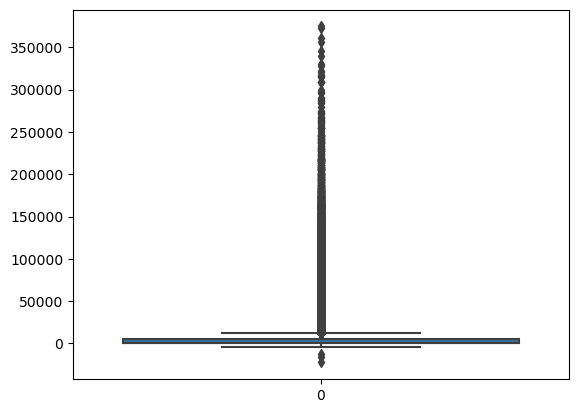

In [30]:
sns.boxplot(data.Overtime)

In [31]:
min1=data.Overtime.min()
max1=data.Overtime.max()

In [32]:
min1

-22453.28

In [33]:
max1

374502.76

In [34]:
q1=data.Overtime.quantile(0.25)
q3=data.Overtime.quantile(0.75)
iqr=q3-q1
UF=q3+1.5*iqr
LF=q1-1.5*iqr

In [35]:
data=data[(data.Overtime>LF)&(data.Overtime<UF)]
data.Overtime=data.Overtime.abs()

<Axes: xlabel='Overtime', ylabel='Total Compensation'>

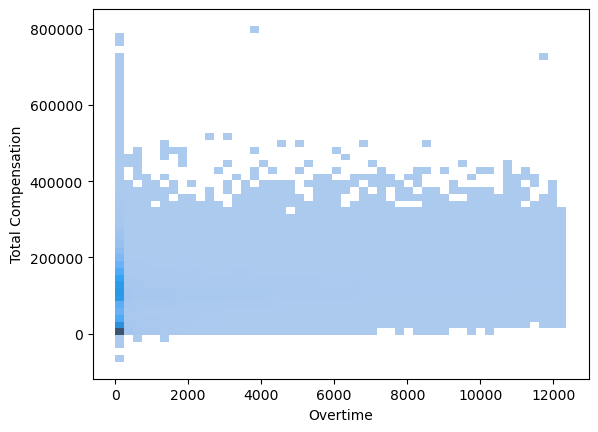

In [36]:
sns.histplot(x=data.Overtime,y=data['Total Compensation'],bins=50)

In [37]:
#Other Salaries

data['Other Salaries'].value_counts()

0.00        267099
624.00       10656
250.00        5743
1560.00       4145
1500.00       1224
             ...  
6689.74          1
3498.51          1
59211.42         1
7662.34          1
5350.17          1
Name: Other Salaries, Length: 272416, dtype: int64

<Axes: >

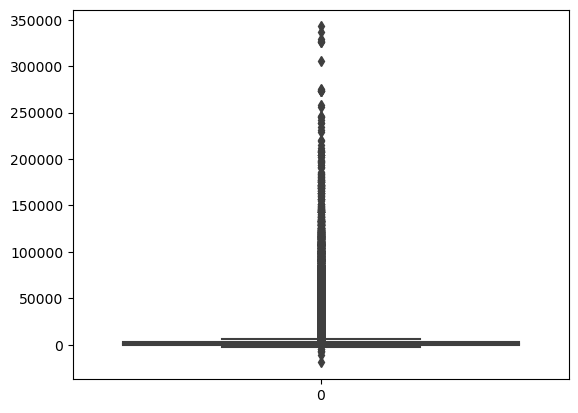

In [38]:
#sns.lineplot(x=data['Other Salaries'].value_counts().index,y=data['Other Salaries'].value_counts())
sns.boxplot(data['Other Salaries'])

<Axes: xlabel='Other Salaries', ylabel='Total Compensation'>

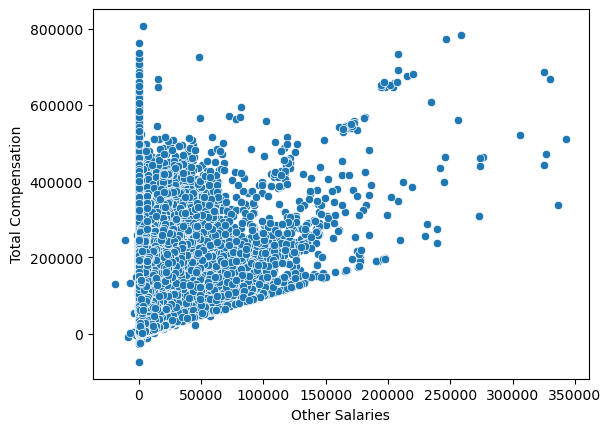

In [39]:
sns.scatterplot(x=data['Other Salaries'],y=data['Total Compensation'])

In [40]:
data['Total Salary'].value_counts()

250.00       772
0.00         692
1196.00      310
150.00       156
200.00       133
            ... 
78471.17       1
62808.49       1
114482.75      1
84117.26       1
98166.02       1
Name: Total Salary, Length: 633505, dtype: int64

<Axes: xlabel='Total Salary', ylabel='Total Compensation'>

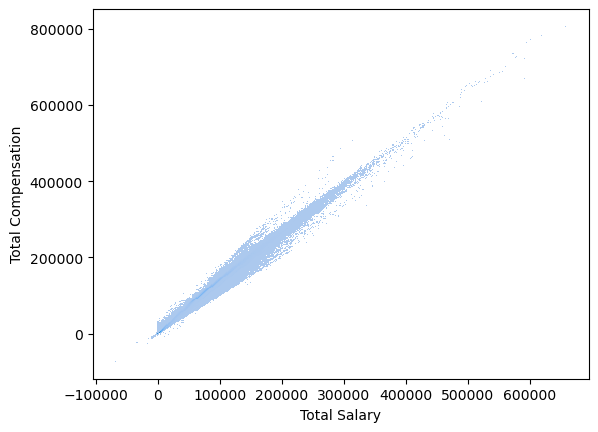

In [41]:
sns.histplot(x=data['Total Salary'],y=data['Total Compensation'])

In [42]:
data['Total Salary']=data['Total Salary'].abs()

<Axes: xlabel='Total Salary', ylabel='Total Compensation'>

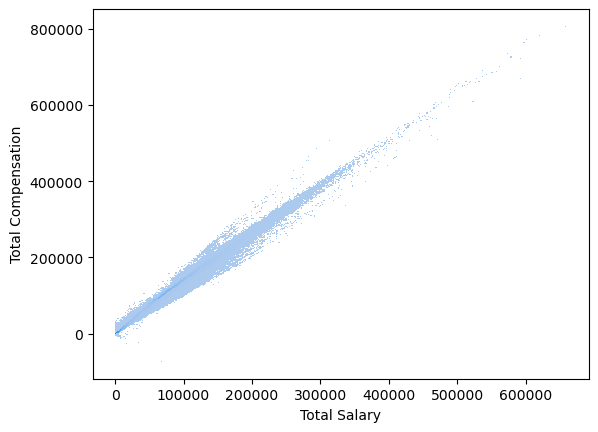

In [43]:
sns.histplot(x=data['Total Salary'],y=data['Total Compensation'])

<Axes: >

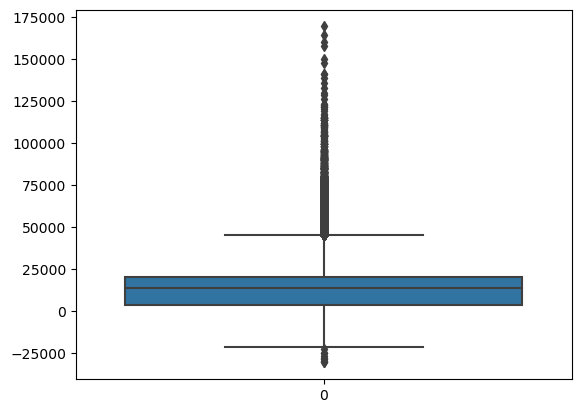

In [44]:
sns.boxplot(data.Retirement)

In [45]:
def outliers(column):
    global data
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    iqr=q3-q1
    UF=q3+1.5*iqr
    LF=q1-1.5*iqr
    data=data[(data[column]>LF)&(data[column]<UF)]
    data[column]=data[column].abs()
    sns.histplot(x=data[column],y=data['Total Compensation'])

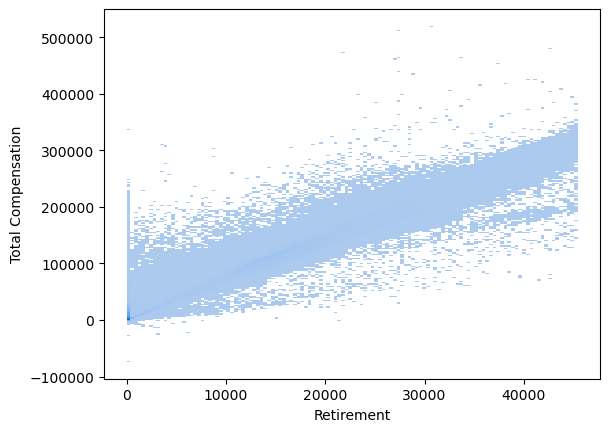

In [46]:
outliers('Retirement')

In [47]:
for i in numerical_column.columns:
    data[i]=data[i].abs()

<Axes: >

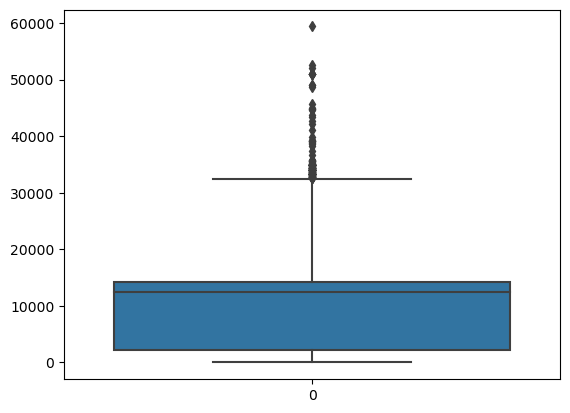

In [48]:
sns.boxplot(data['Health and Dental'])

<Axes: xlabel='Health and Dental', ylabel='Count'>

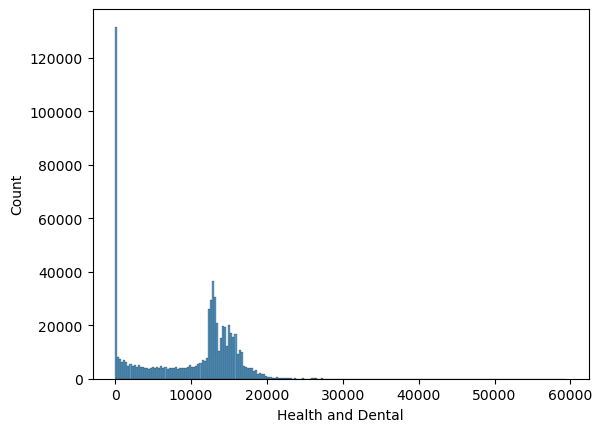

In [49]:
sns.histplot(data['Health and Dental'])

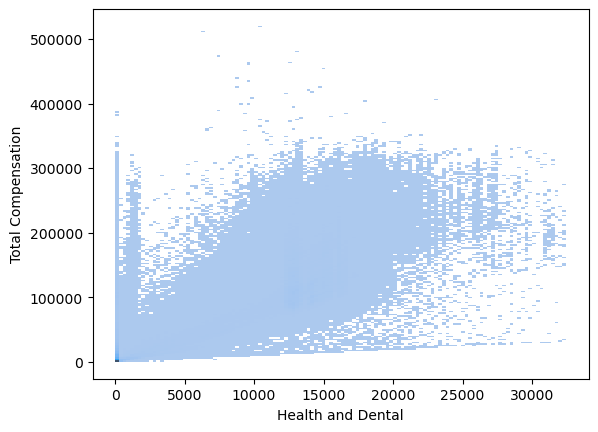

In [50]:
outliers('Health and Dental')

<Axes: >

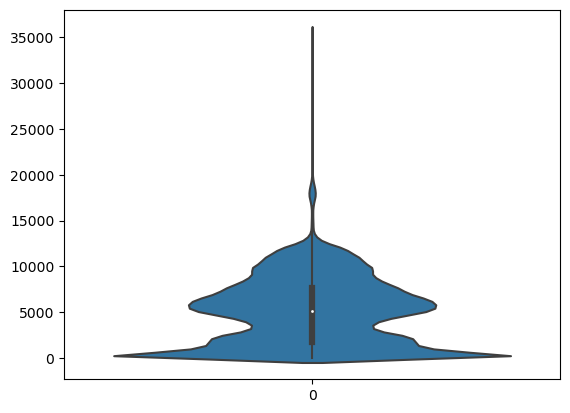

In [51]:
sns.violinplot(data['Other Benefits'])

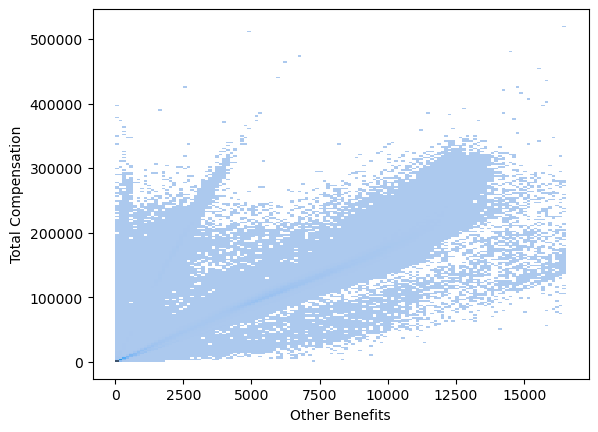

In [52]:
outliers('Other Benefits')

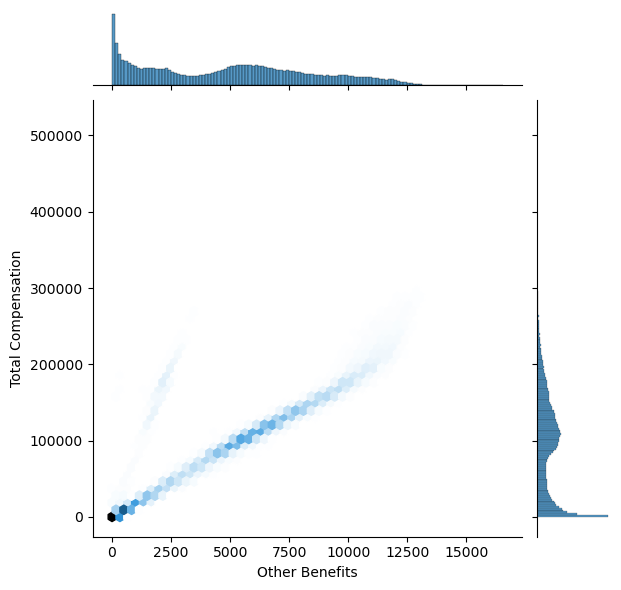

In [53]:
sns.jointplot(x='Other Benefits', y='Total Compensation', data=data, kind='hex')

In [54]:
data['Total Benefits'].value_counts()

0.00        646
18.74       111
0.01         99
92.83        71
90.33        64
           ... 
53912.43      1
43780.33      1
36598.17      1
59197.96      1
42085.56      1
Name: Total Benefits, Length: 628353, dtype: int64

<Axes: >

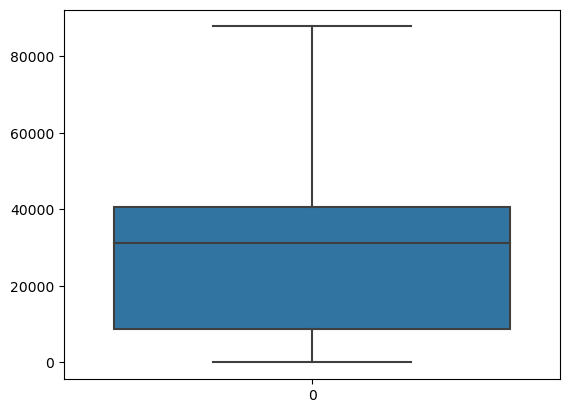

In [55]:
sns.boxplot(data['Total Benefits'])

<Axes: xlabel='Total Benefits', ylabel='Total Compensation'>

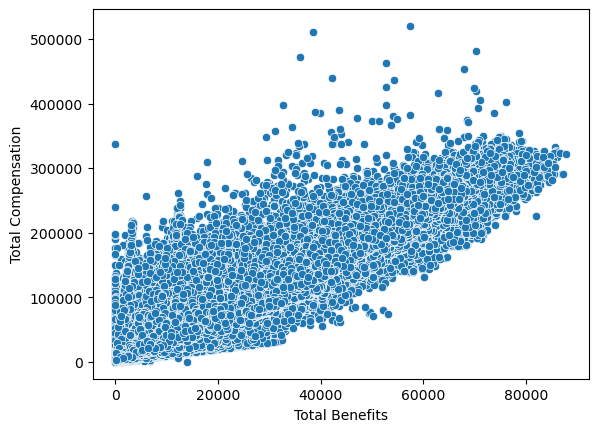

In [56]:
sns.scatterplot(x='Total Benefits',y='Total Compensation', data=data)

In [57]:
categorical_column

Job Family Code Job Code Year Type  \
0                 1400     1404    Fiscal   
1                 9700     9703    Fiscal   
2                 2900     2918    Fiscal   
3                 2900     2918    Fiscal   
4                 2900     2905    Fiscal   
...                ...      ...       ...   
840500            7300     7345    Fiscal   
840501            7300     7345    Fiscal   
840502            7300     7345  Calendar   
840503            7300     7345  Calendar   
840504            7300     7345  Calendar   

                              Organization Group Department Code  \
0       Human Welfare & Neighborhood Development             HSA   
1       Human Welfare & Neighborhood Development             HSA   
2       Human Welfare & Neighborhood Development             HSA   
3       Human Welfare & Neighborhood Development             HSA   
4       Human Welfare & Neighborhood Development             HSA   
...                                          ...             ...   
840500   Public Works, Transportation & Commerce             AIR   
840501   Public Works, Transportation & Commerce             AIR   
840502   Public Works, Transportation & Commerce             AIR   
840503   Public Works, Transportation & Commerce             AIR   
840504   Public Works, Transportation & Commerce             AIR   

                    Department                        Union  \
0               Human Services       SEIU, Local 1021, Misc   
1               Human Services       SEIU, Local 1021, Misc   
2               Human Services       SEIU, Local 1021, Misc   
3               Human Services       SEIU, Local 1021, Misc   
4               Human Services       SEIU, Local 1021, Misc   
...                        ...                          ...   
840500  AIR Airport Commission  Electrical Workers, Local 6   
840501  AIR Airport Commission  Electrical Workers, Local 6   
840502  AIR Airport Commission  Electrical Workers, Local 6   
840503  AIR Airport Commission  Electrical Workers, Local 6   
840504  AIR Airport Commission  Electrical Workers, Local 6   

                           Job Family                         Job  
0       Clerical, Secretarial & Steno                       Clerk  
1               Community Development  HSA Emp & Training Spec II  
2                      Human Services           HSA Social Worker  
3                      Human Services           HSA Social Worker  
4                      Human Services   HSA Sr Eligibility Worker  
...                               ...                         ...  
840500               Journeyman Trade                 Electrician  
840501               Journeyman Trade                 Electrician  
840502               Journeyman Trade                 Electrician  
840503               Journeyman Trade                 Electrician  
840504               Journeyman Trade                 Electrician  

[840318 rows x 9 columns]

In [58]:
data['Job Family Code'].value_counts()

2300              77534
9100              46121
2900              42206
1400              35894
7300              35851
9900              34943
2700              26218
1800              26178
Q000              25932
5200              24099
3200              22683
1000              21336
8200              19948
0900              19662
8100              17685
2500              16777
1600              16267
3600              15310
H000              14593
2400              13262
1200              12419
8300              10320
5300               9922
7500               9630
0000               9519
3400               8606
9200               7049
9700               6488
7200               5807
7400               5320
2600               5268
2200               5191
SCRT               4393
6300               4245
1900               4125
4200               3731
1300               3706
5600               3672
8400               3513
2800               3451
2100               3172
1700            

In [59]:
def bar_count(ax):
    for bar in ax.patches:
        count = f'{round(bar.get_height(),2)}'
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()/2
        ax.annotate(count, (x, y), va='bottom', ha='center',rotation=90)

In [60]:
def bar_percentage(ax):
    for bar in ax.patches:
        percentage =f'{round(bar.get_height()/len(data),4)}%'
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage,(x,y),va='bottom', ha='center',rotation=90)

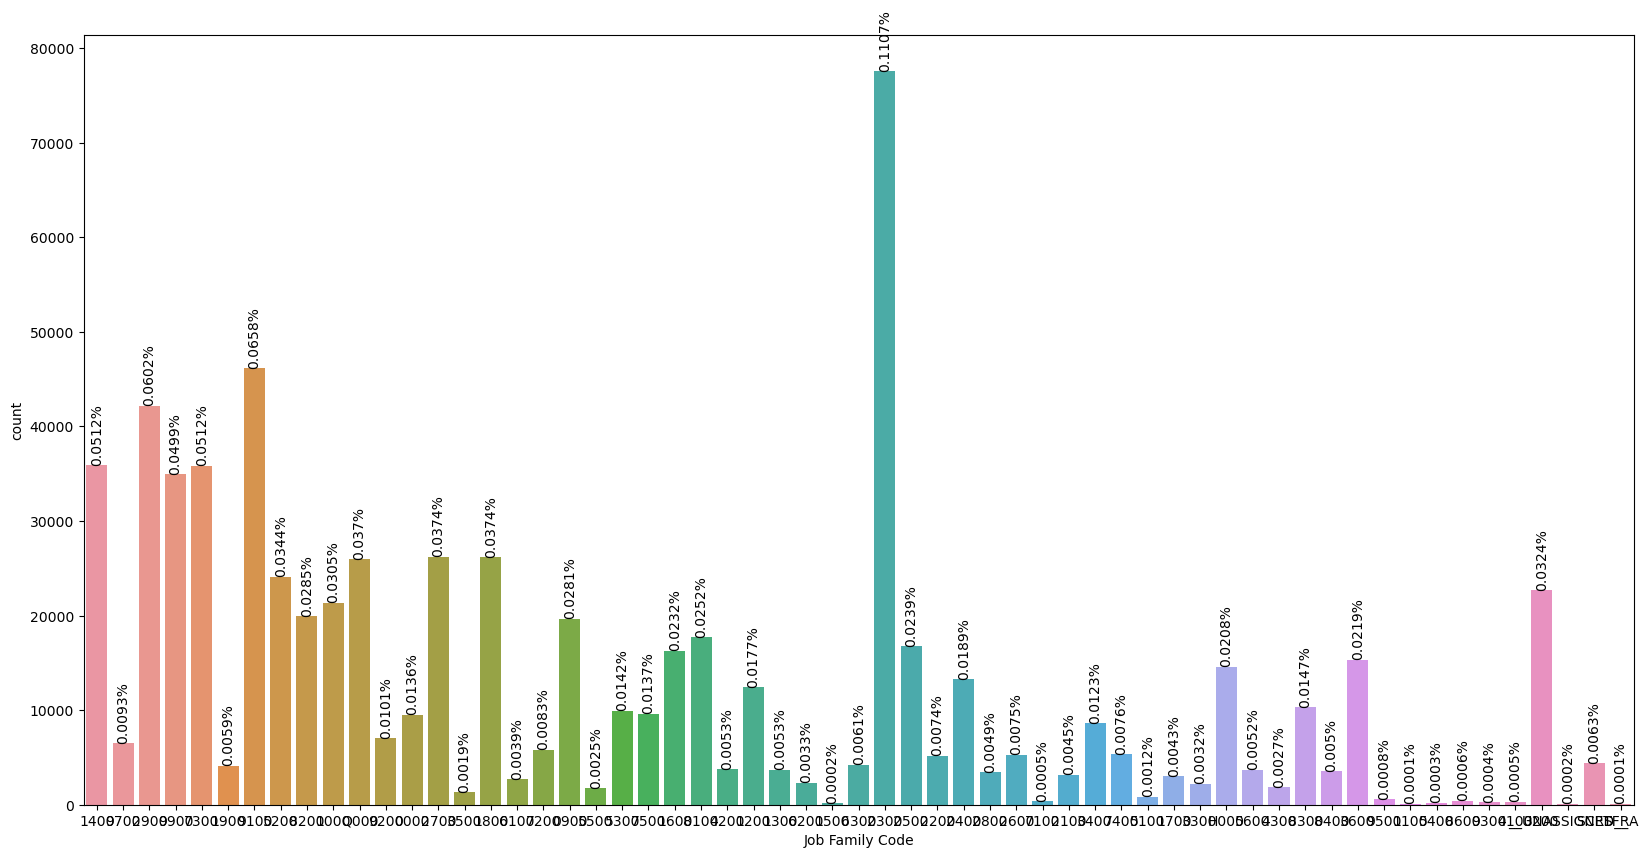

In [61]:
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x=data['Job Family Code'])
bar_percentage(ax)

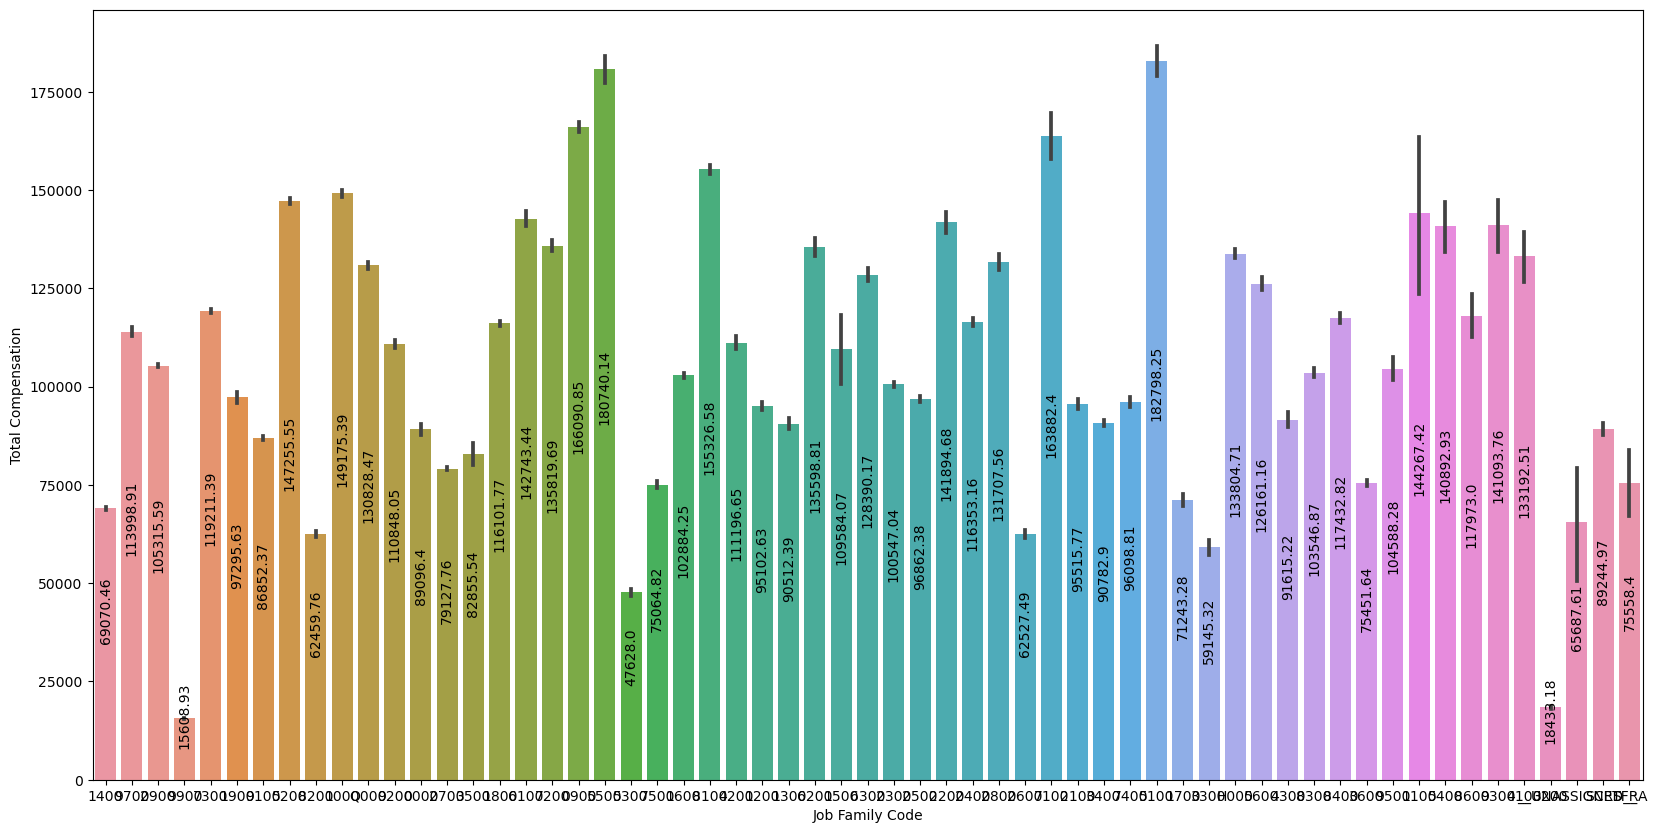

In [62]:
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=data['Job Family Code'],y=data['Total Compensation'])
bar_count(ax)

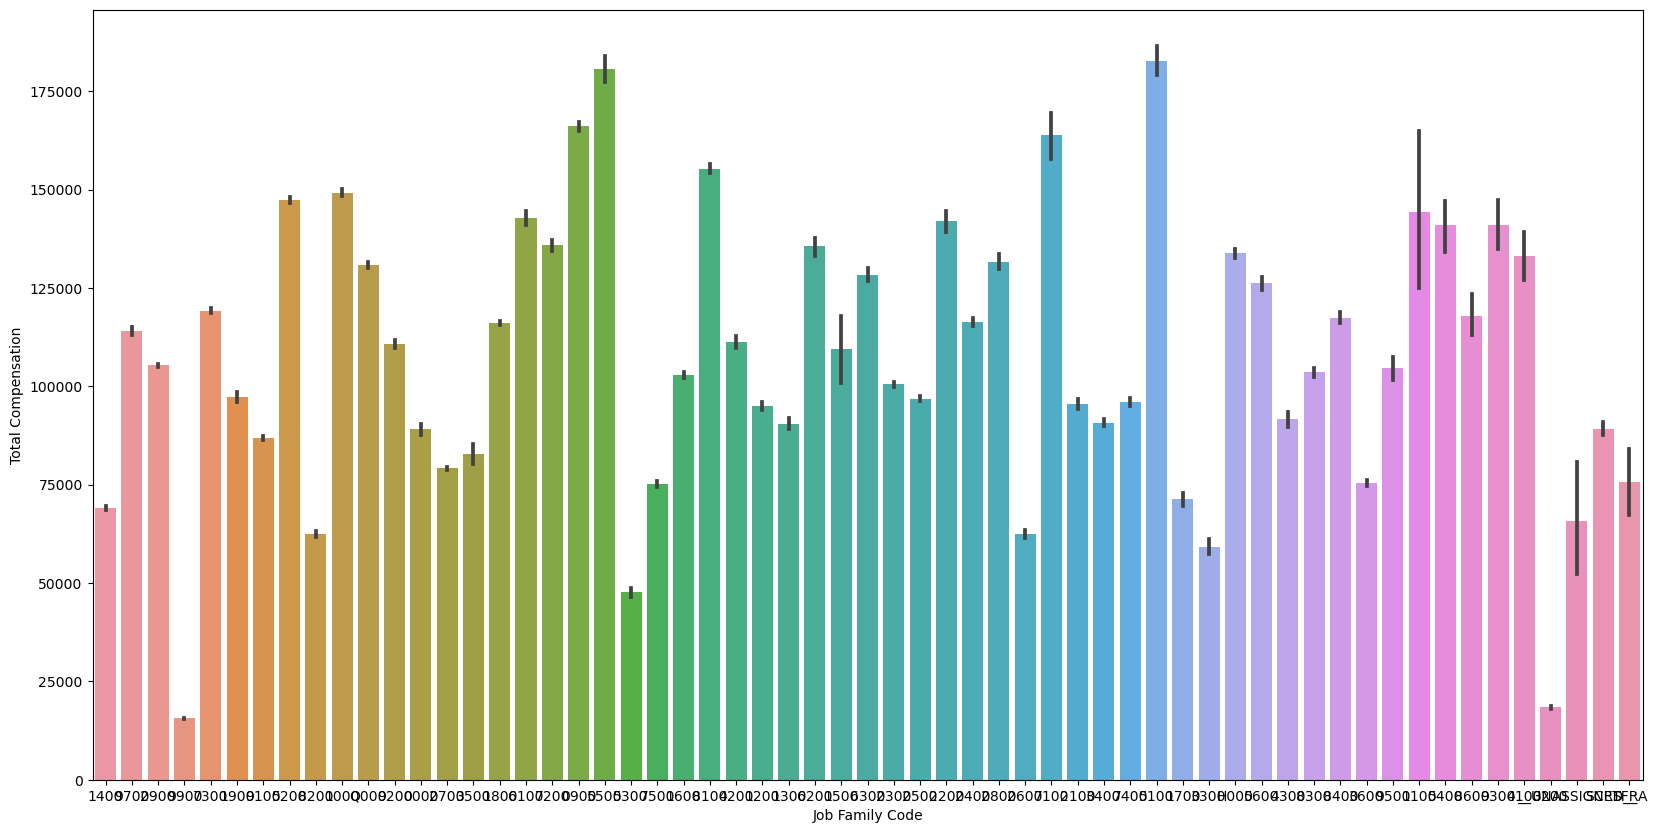

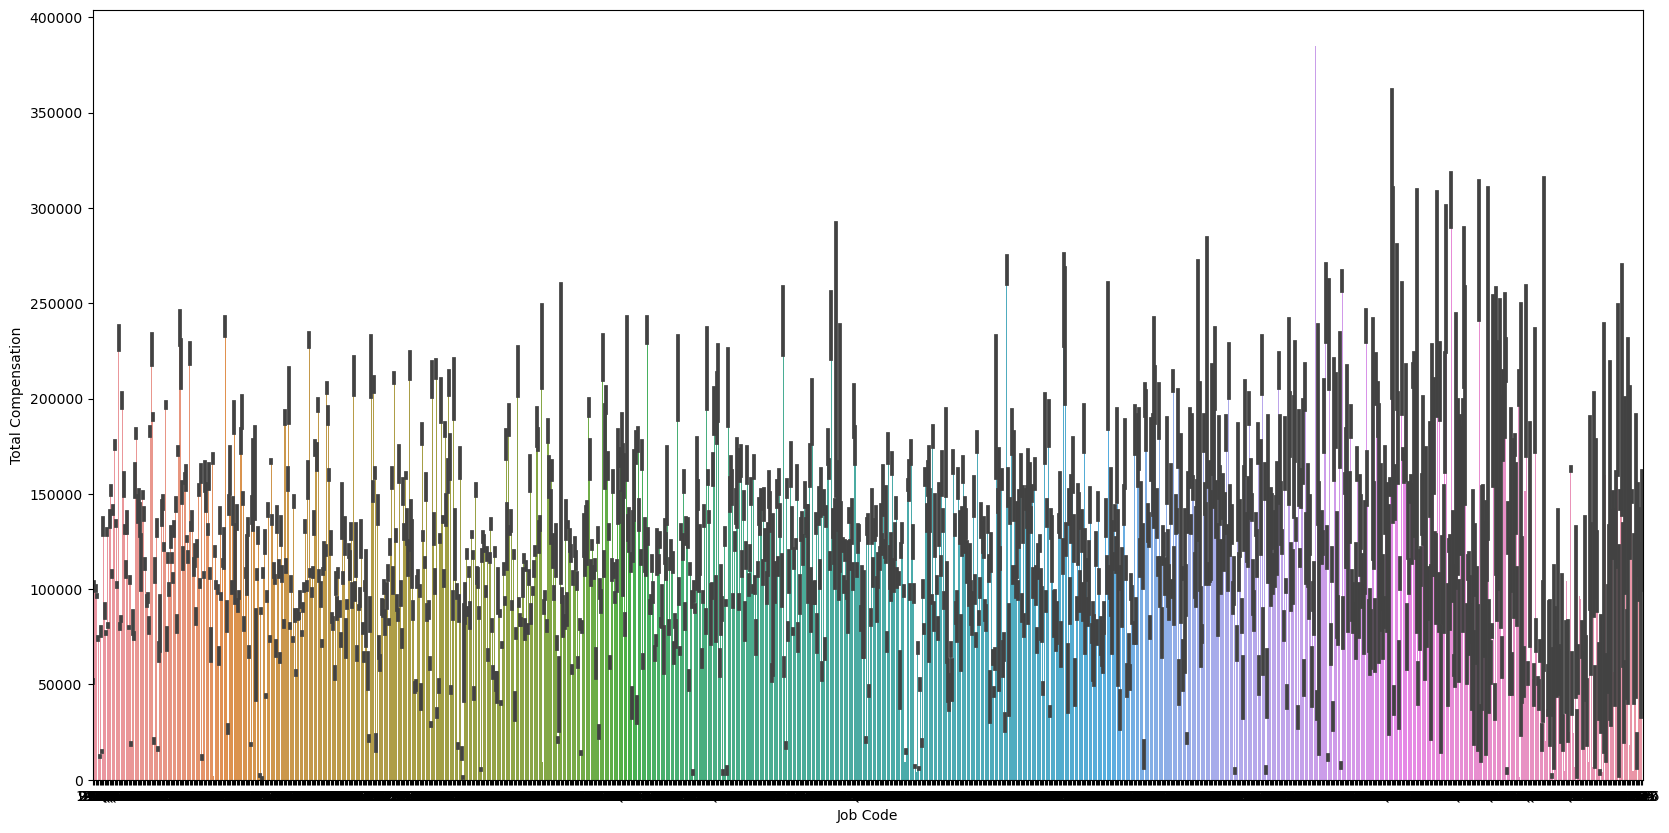

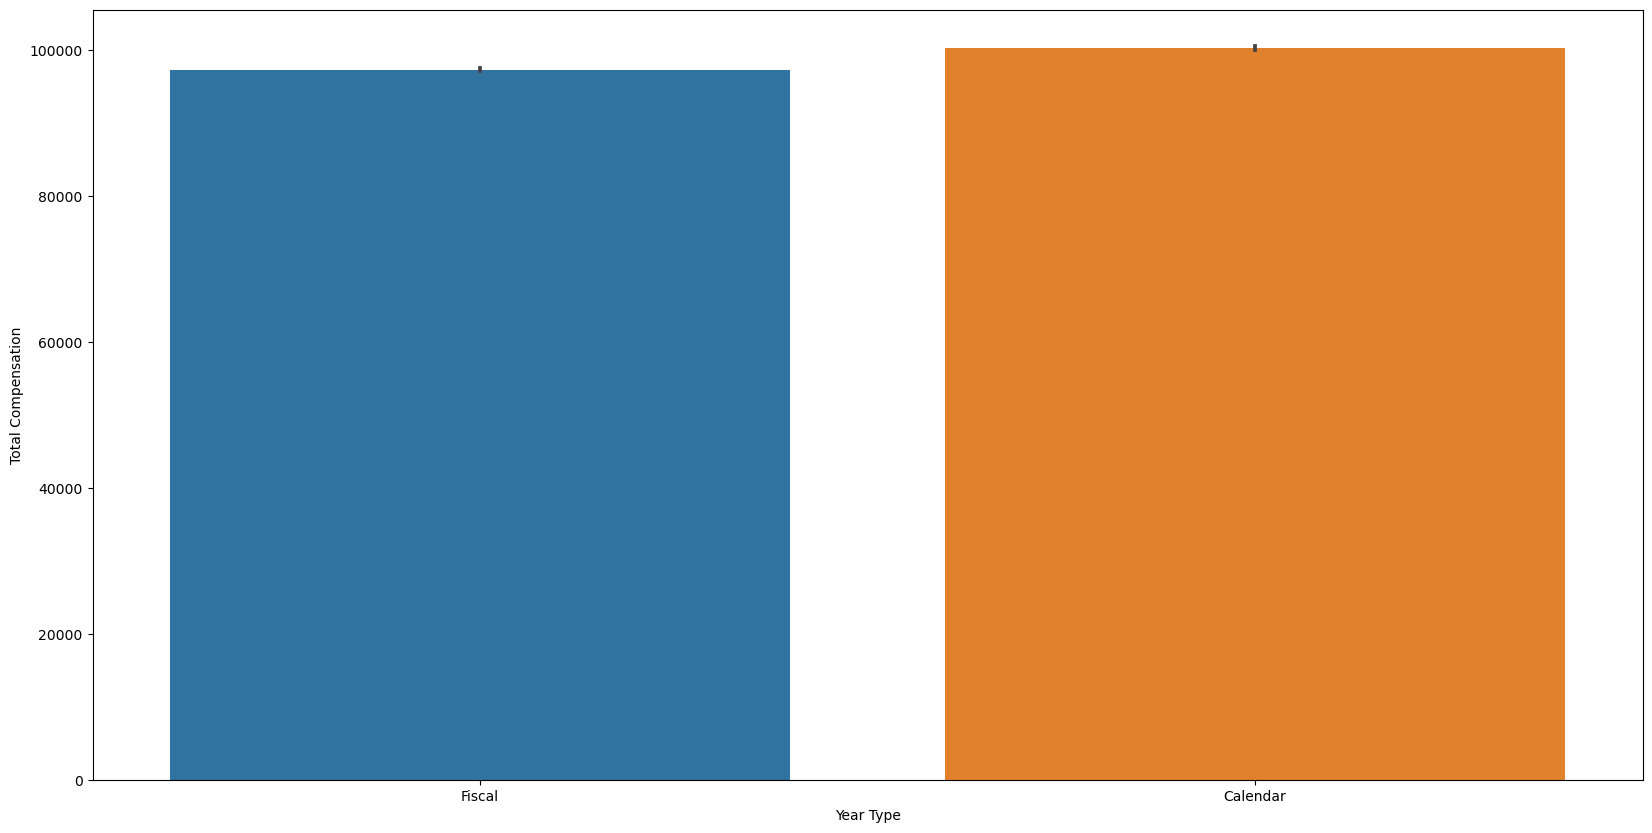

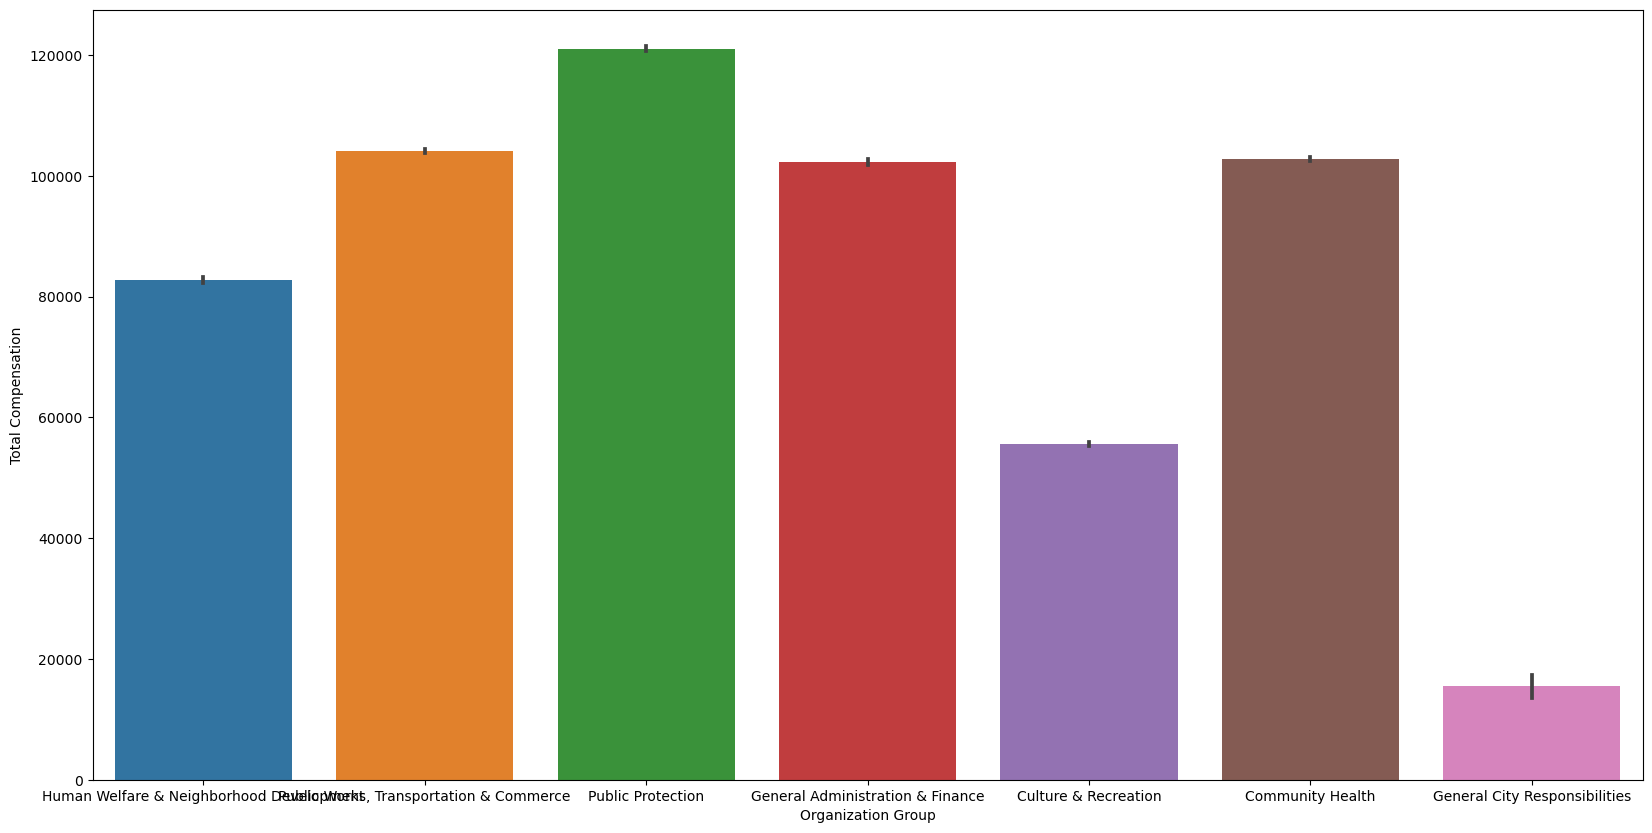

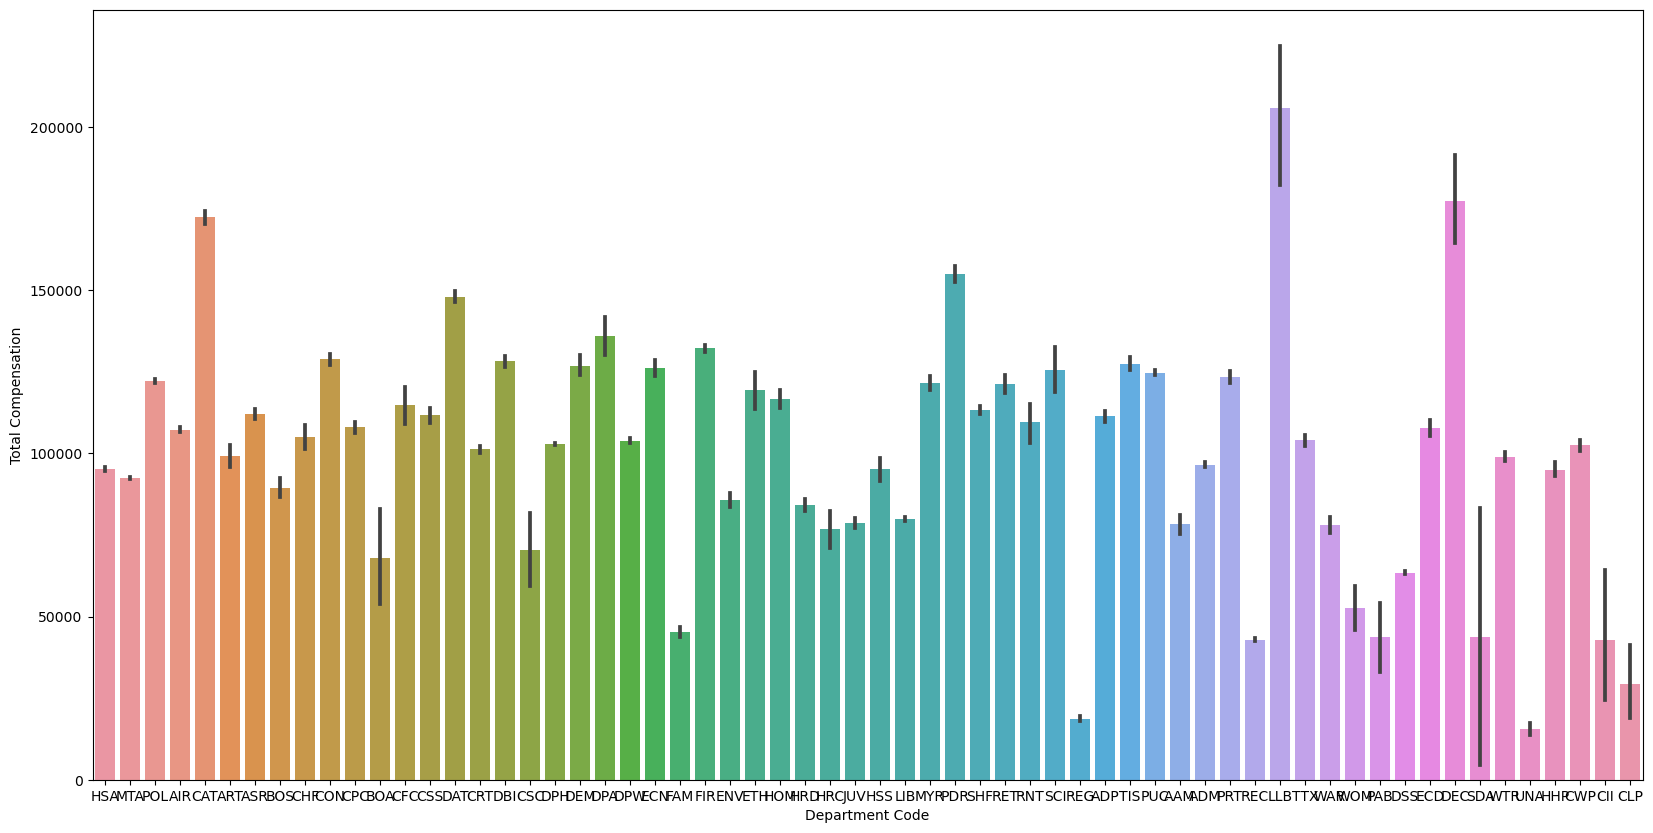

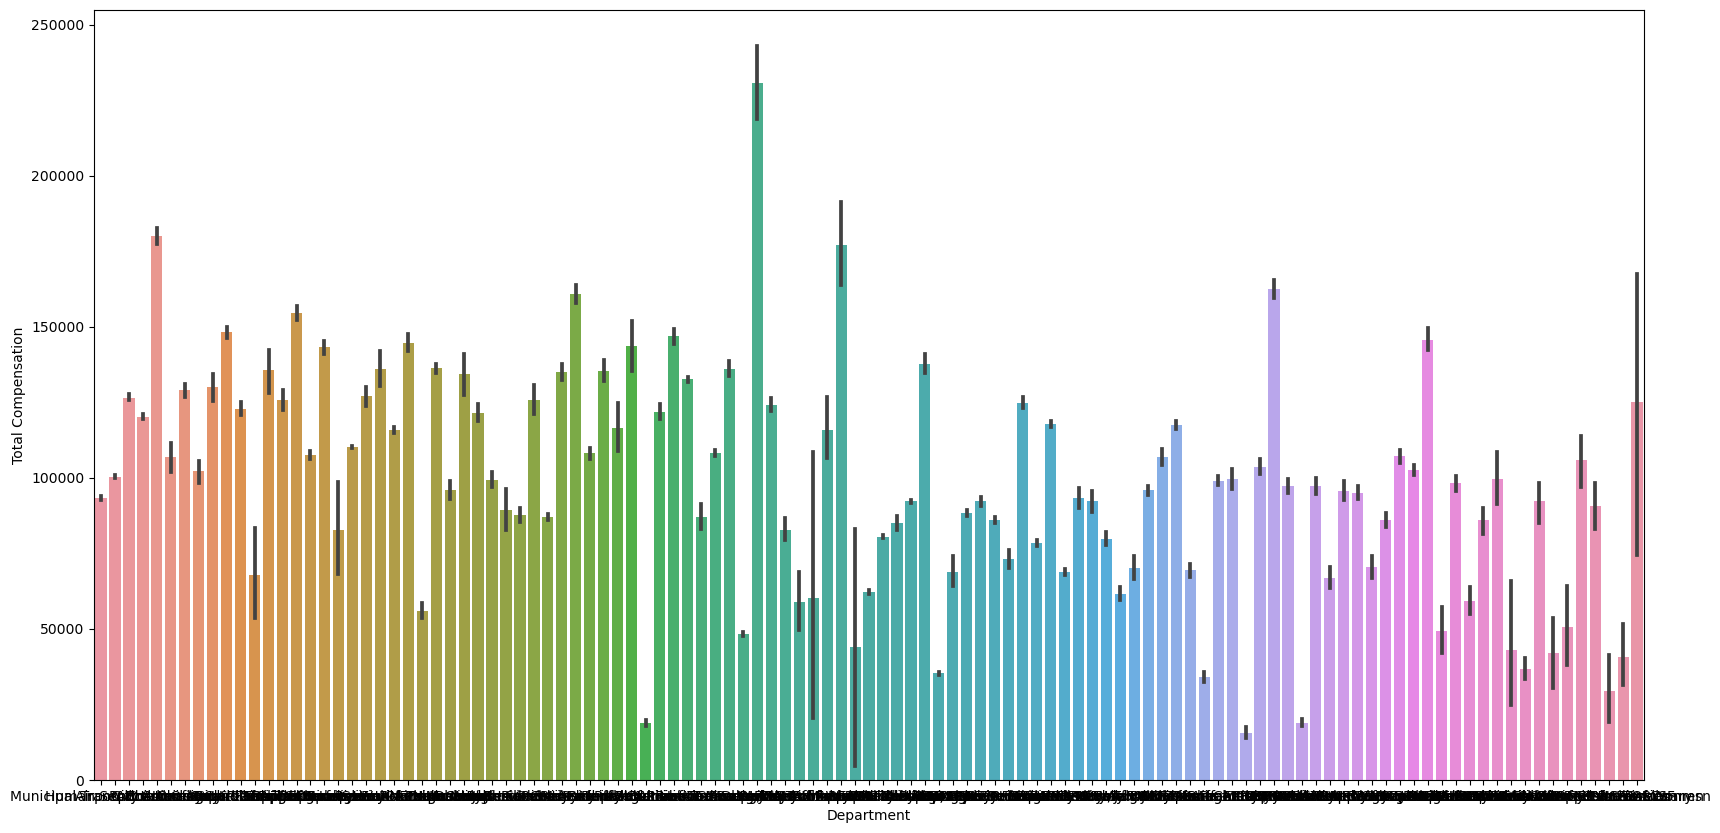

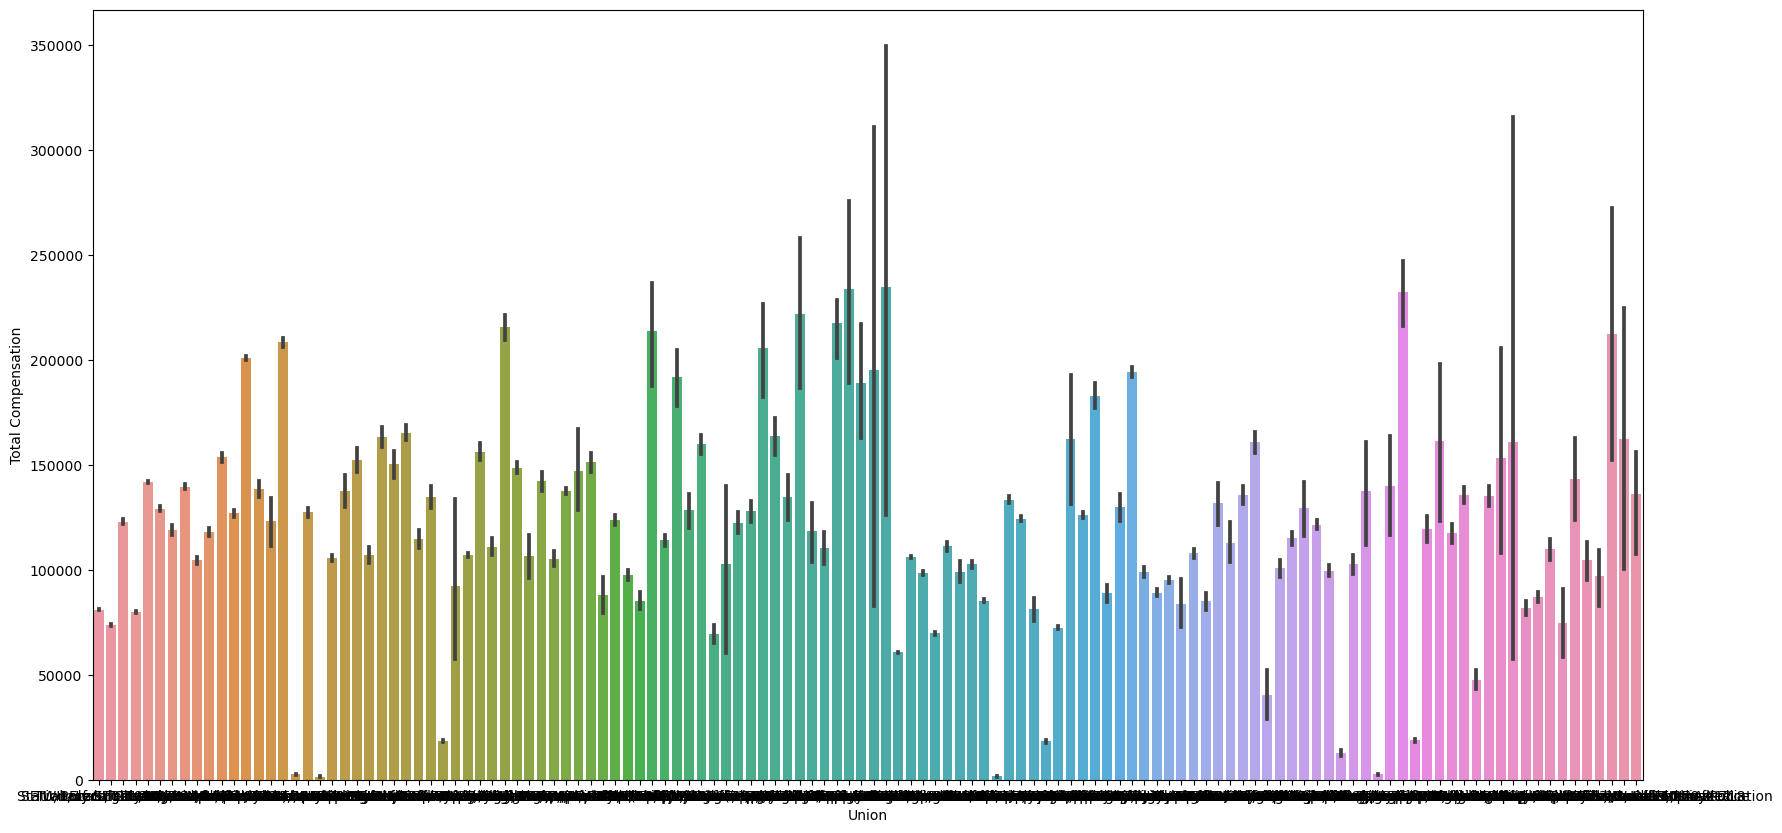

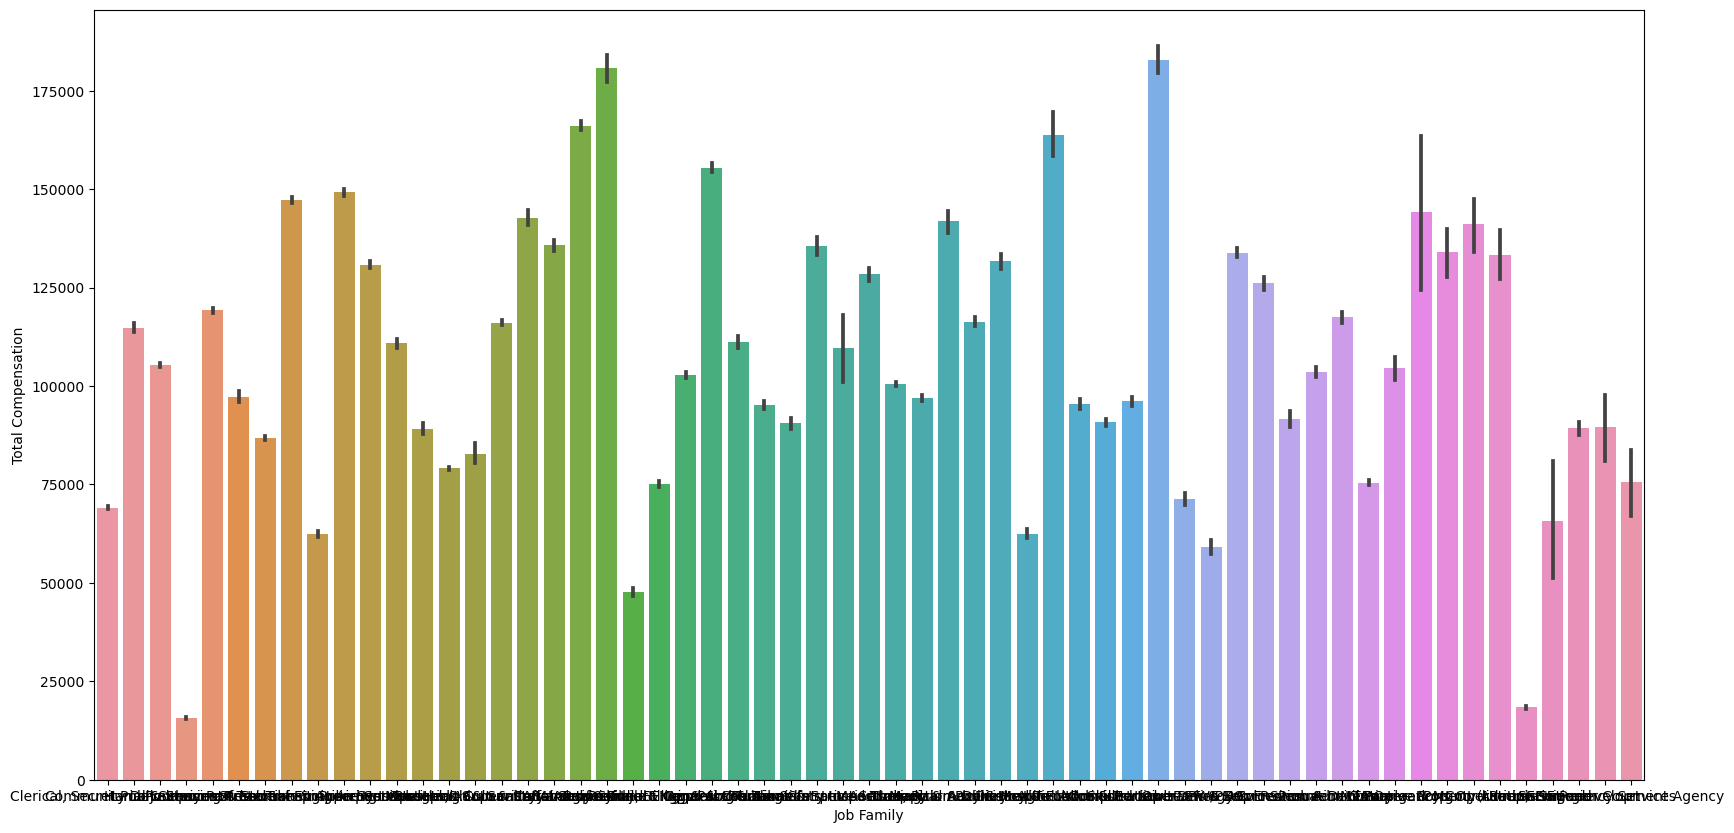

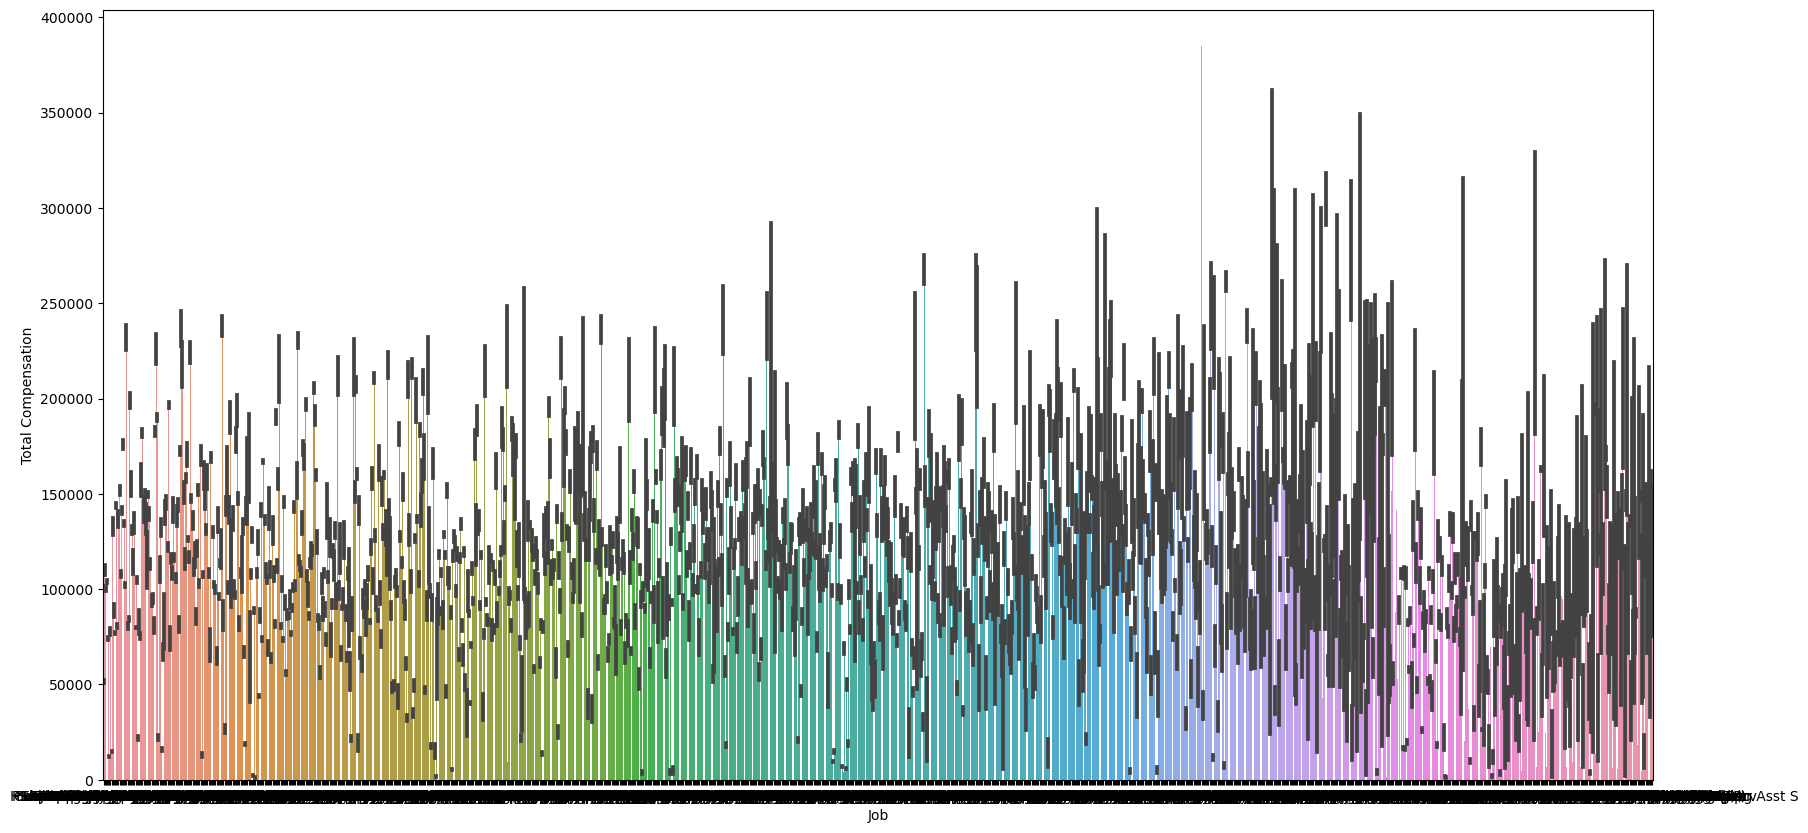

In [63]:
for i in categorical_column.columns:
    fig,ax=plt.subplots(figsize=(20,10))
    ax=sns.barplot(x=data[i],y=data['Total Compensation'])

In [64]:
categorical_column.columns

Index(['Job Family Code', 'Job Code', 'Year Type', 'Organization Group',
       'Department Code', 'Department', 'Union', 'Job Family', 'Job'],
      dtype='object')

## 1. Identify the top-paying departments in terms of average total compensation and determine the factors contributing to their higher compensation levels.

In [65]:

d=data.groupby('Department')['Total Compensation'].mean().sort_values(ascending=False)
d1,d1v=d.index[:10],d.values[:10]
#d2,d2v=d.index[50:],d.values[50:]

'ax[1]=sns.barplot(x=d2,y=d2v,ax=ax[1])\nax[1].set_xticklabels(d2,rotation=90,fontsize=6);\nbar_count(ax[1])'

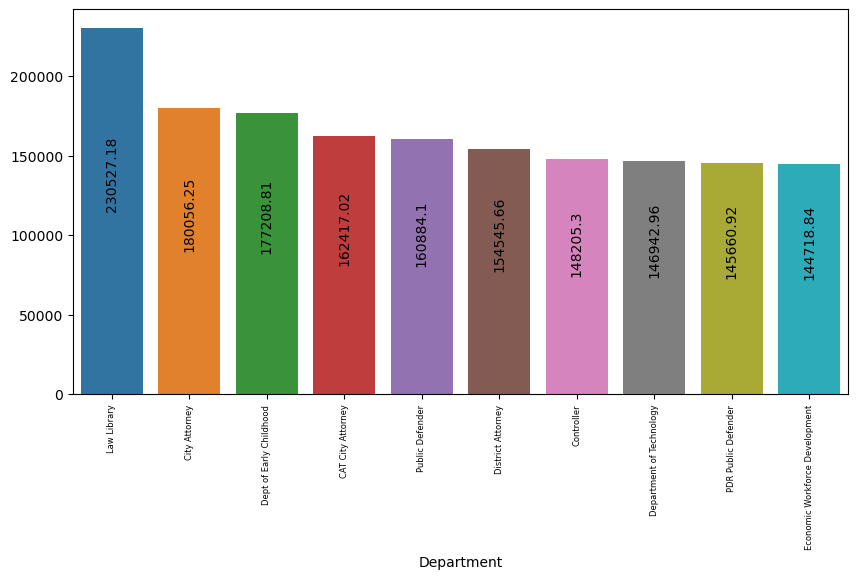

In [66]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(x=d1,y=d1v)
ax.set_xticklabels(d1,rotation=90,fontsize=6);
bar_count(ax)
'''ax[1]=sns.barplot(x=d2,y=d2v,ax=ax[1])
ax[1].set_xticklabels(d2,rotation=90,fontsize=6);
bar_count(ax[1])'''

In [67]:
c = data.corr()

C:\Users\Futurense\AppData\Local\Temp\ipykernel_9132\1244930591.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = data.corr()


In [68]:
c.columns

Index(['Organization Group Code', 'Year', 'Union Code', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

<Axes: >

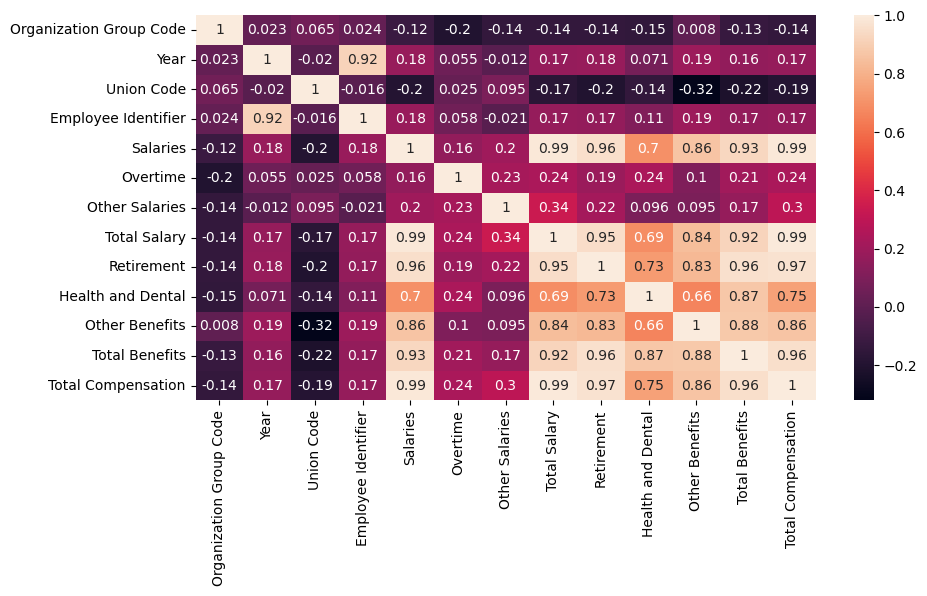

In [69]:
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(c,annot=True)


In [70]:
#factors=['Salaries','Total Salary','Retirement','Total Benefits']
#since salaries get included in total salary and retirement get included in total benefits

factors=['Total Salary','Total Benefits']

In [71]:
department=d.head(5)

In [72]:
df=data[data['Department'].isin(department.index)]

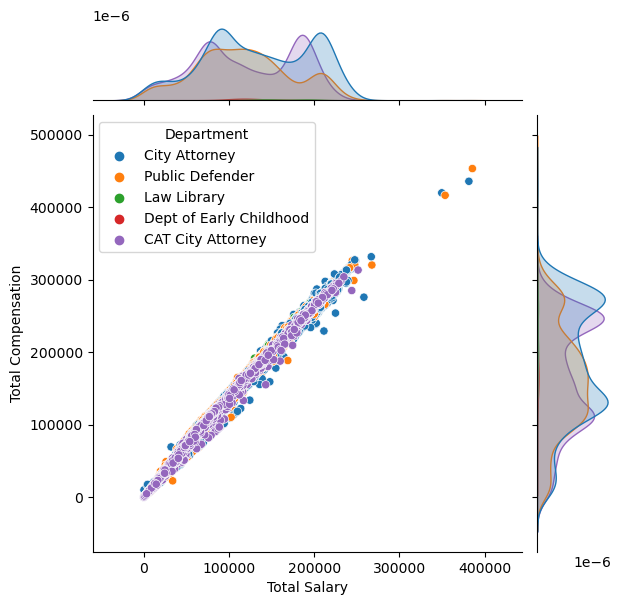

In [73]:
sns.jointplot(x=df['Total Salary'],y=df['Total Compensation'],hue=df['Department'])

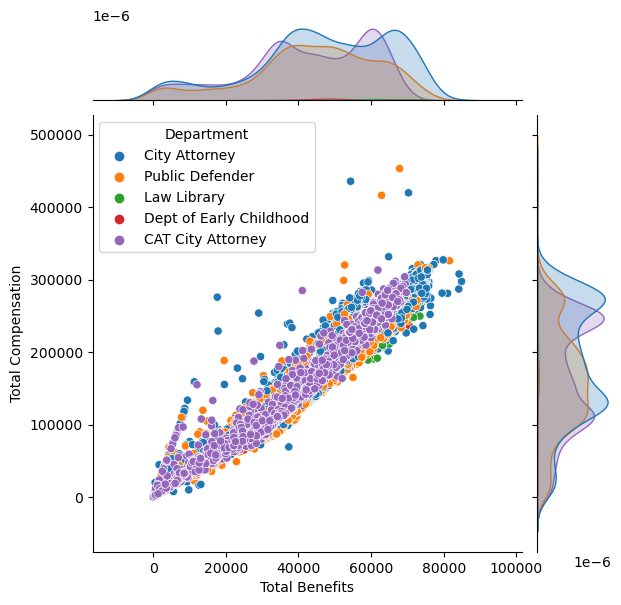

In [74]:
sns.jointplot(x=df['Total Benefits'],y=df['Total Compensation'],hue=df['Department'])

Conclusion : Library ,City Attorney are the 2 top-paying departments and the factors such as Salaries , Retirement and Benefits 
have high correlation around 0.9 with Total Compensation.

In [75]:
data.head(10)

Organization Group Code Job Family Code Job Code Year Type  Year  \
0                        3            1400     1404    Fiscal  2019   
1                        3            9700     9703    Fiscal  2019   
2                        3            2900     2918    Fiscal  2019   
3                        3            2900     2918    Fiscal  2019   
4                        3            2900     2905    Fiscal  2019   
5                        3            2900     2918    Fiscal  2019   
6                        3            2900     2905    Fiscal  2019   
7                        3            1400     1406    Fiscal  2019   
8                        3            9900     9910    Fiscal  2019   
9                        3            2900     2904    Fiscal  2019   

                         Organization Group Department Code      Department  \
0  Human Welfare & Neighborhood Development             HSA  Human Services   
1  Human Welfare & Neighborhood Development             HSA  Human Services   
2  Human Welfare & Neighborhood Development             HSA  Human Services   
3  Human Welfare & Neighborhood Development             HSA  Human Services   
4  Human Welfare & Neighborhood Development             HSA  Human Services   
5  Human Welfare & Neighborhood Development             HSA  Human Services   
6  Human Welfare & Neighborhood Development             HSA  Human Services   
7  Human Welfare & Neighborhood Development             HSA  Human Services   
8  Human Welfare & Neighborhood Development             HSA  Human Services   
9  Human Welfare & Neighborhood Development             HSA  Human Services   

   Union Code                   Union  ... Employee Identifier  Salaries  \
0       790.0  SEIU, Local 1021, Misc  ...            37486688  60720.01   
1       535.0  SEIU, Local 1021, Misc  ...            39646203  91677.00   
2       535.0  SEIU, Local 1021, Misc  ...            37486043  89106.03   
3       535.0  SEIU, Local 1021, Misc  ...            37615772  85581.11   
4       535.0  SEIU, Local 1021, Misc  ...            37500212  86457.00   
5       535.0  SEIU, Local 1021, Misc  ...            37495705  89106.07   
6       535.0  SEIU, Local 1021, Misc  ...            40496215  86407.12   
7       790.0  SEIU, Local 1021, Misc  ...            40666195  50843.50   
8       790.0  SEIU, Local 1021, Misc  ...            39596095   2585.45   
9       535.0  SEIU, Local 1021, Misc  ...            37677262  17751.02   

   Overtime  Other Salaries  Total Salary  Retirement  Health and Dental  \
0      0.00            0.00      60720.01    13653.20           14733.76   
1      0.00            0.00      91677.00    17524.20           14733.76   
2      0.00         1540.00      90646.03    17327.20           14733.76   
3   3355.94          337.75      89274.80    16359.16           14151.56   
4      0.00         2090.00      88547.00    16925.97           14733.76   
5      0.00         2164.00      91270.07    17446.56           14733.76   
6     53.05            0.00      86460.17    16516.87           14725.26   
7      0.00            0.00      50843.50    11431.17           14450.41   
8      0.00            0.00       2585.45        0.00               0.00   
9      0.00          612.83      18363.85        0.00               0.00   

   Other Benefits  Total Benefits  Total Compensation  
0         4904.34        33291.30            94011.31  
1         7411.13        39669.09           131346.09  
2         7401.92        39462.88           130108.91  
3         7096.21        37606.93           126881.73  
4         7257.89        38917.62           127464.62  
5         7253.08        39433.40           130703.47  
6         6865.34        38107.47           124567.64  
7         4156.79        30038.37            80881.87  
8          227.78          227.78             2813.23  
9         1425.32         1425.32            19789.17  

[10 rows x 22 columns]

## 2. Investigate the trends in employee compensation over the years, comparing fiscal and calendar years, and identify any significant changes or patterns.

In [76]:
data1=data[data['Year Type']=='Fiscal']
data2=data[~(data['Year Type']=='Fiscal')]

Text(0.5, 1.0, 'Calender Years')

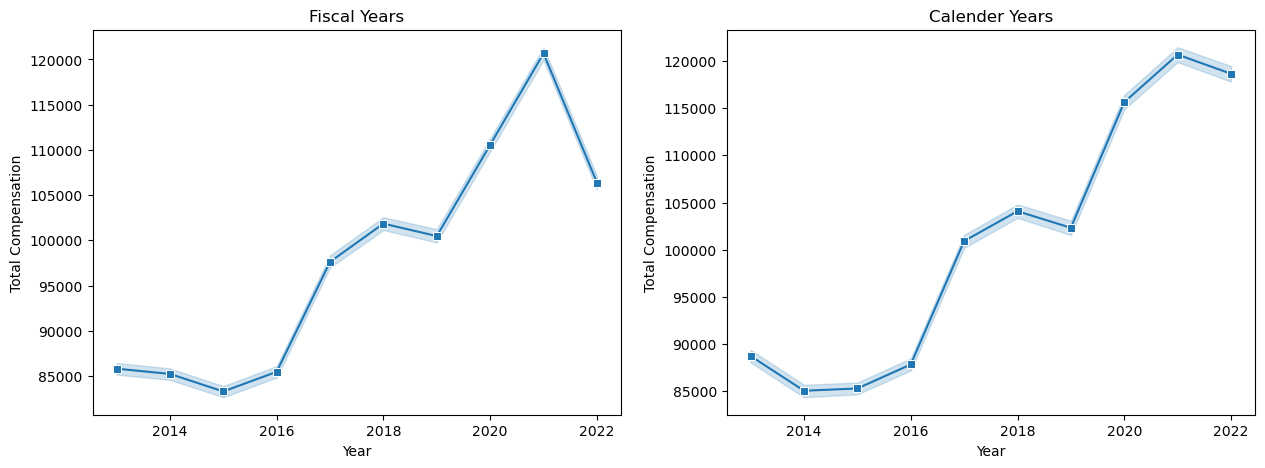

In [77]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x=data1['Year'],y=data1['Total Compensation'],ax=ax[0],marker='s')
sns.lineplot(x=data2['Year'],y=data2['Total Compensation'],ax=ax[1],marker='s')
ax[0].set_title('Fiscal Years')
ax[1].set_title('Calender Years')

Conclusion: There was a gradual increase in Total Compensation on 2017 and got peek around 2019 
but sudden dropped by 20% in fiscal year and managable drop in calender years.

## 3.Analyze the distribution of salaries and benefits to understand the overall compensation structure in San Francisco. Identify any outliers or anomalies in the data.

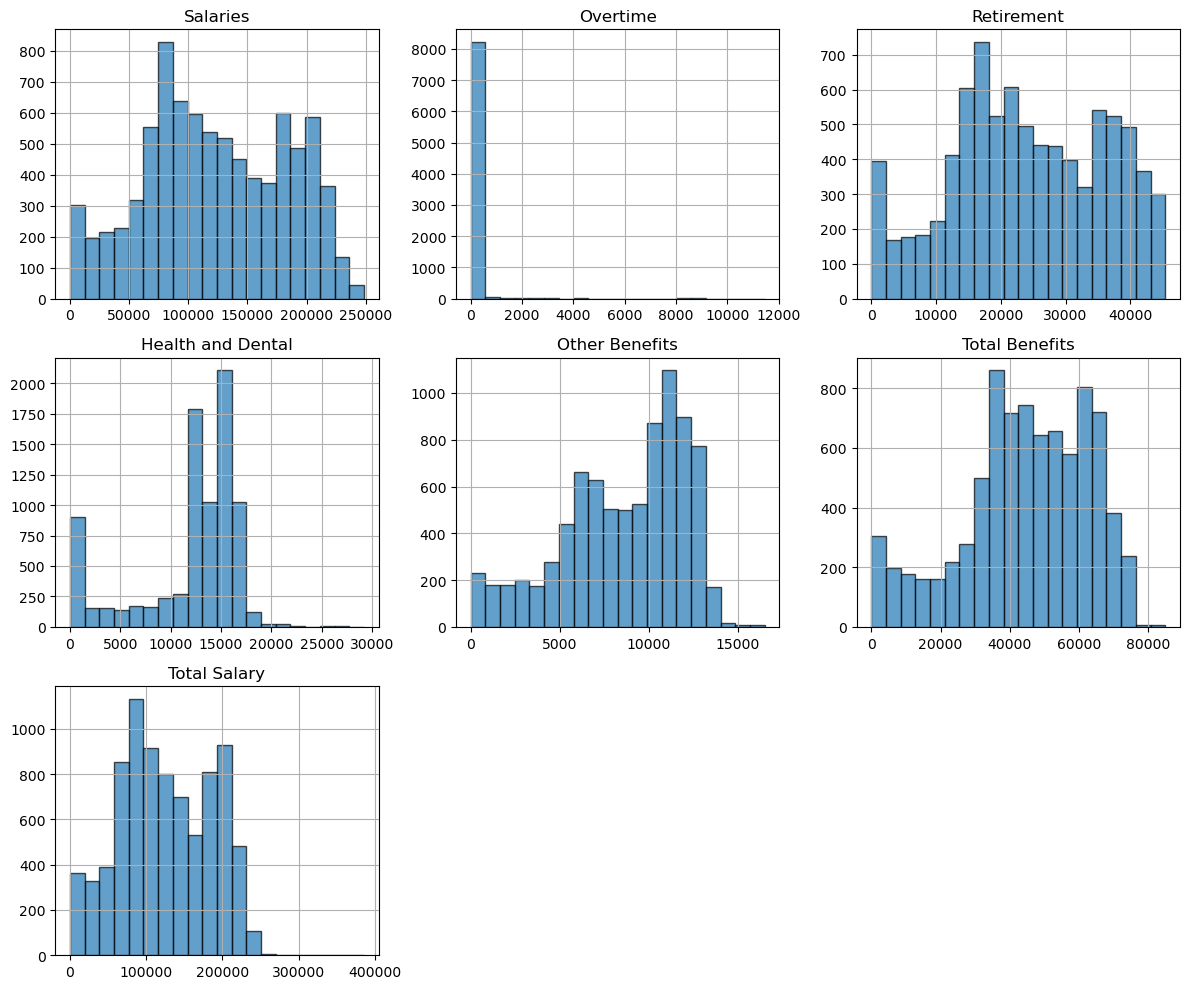

In [78]:
factors =  ['Salaries', 'Overtime', 'Retirement', 'Health and Dental', 'Other Benefits','Total Benefits','Total Salary']
df[factors].hist(bins=20, edgecolor='k', alpha=0.7,figsize=(12,10))
plt.tight_layout()
plt.show()

## 4. Examine the relationship between salaries, overtime, and other forms of compensation to determine if certain job families or departments have higher instances of overtime or irregular payments.

Text(0.5, 1.0, 'Job Family --- Overtime ratio')

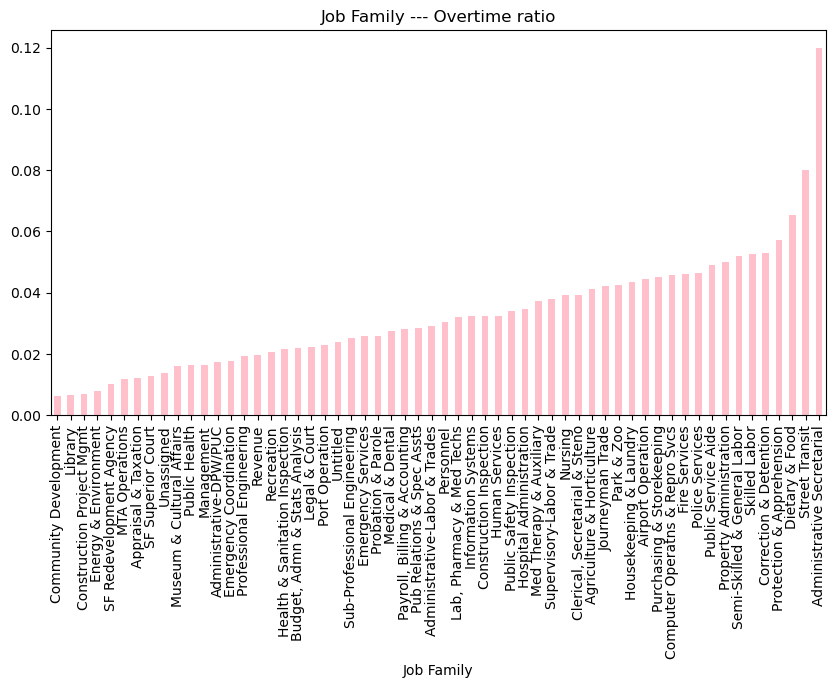

In [124]:

df1=round(data[data['Overtime']>0].groupby('Job Family')[['Salaries','Overtime','Other Salaries','Total Salary']].mean(),2)
df1['overtime_ratio']=df1.Overtime/df1['Total Salary']
df1=df1.sort_values(by='overtime_ratio')
df1['overtime_ratio'].plot(kind='bar',figsize=(10,5),color='pink')
plt.title('Job Family --- Overtime ratio')

Text(0.5, 1.0, 'Job Family --- Salary Ratio')

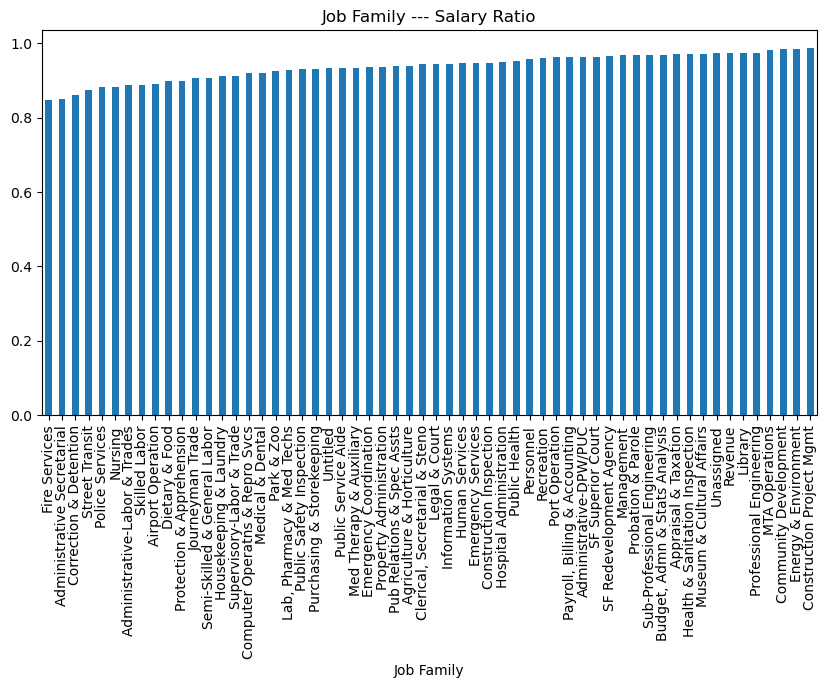

In [127]:
df1['salary_ratio']=df1.Salaries/df1['Total Salary']
df1['salary_ratio'].plot(kind='bar',figsize=(10,5))
plt.title('Job Family --- Salary Ratio')

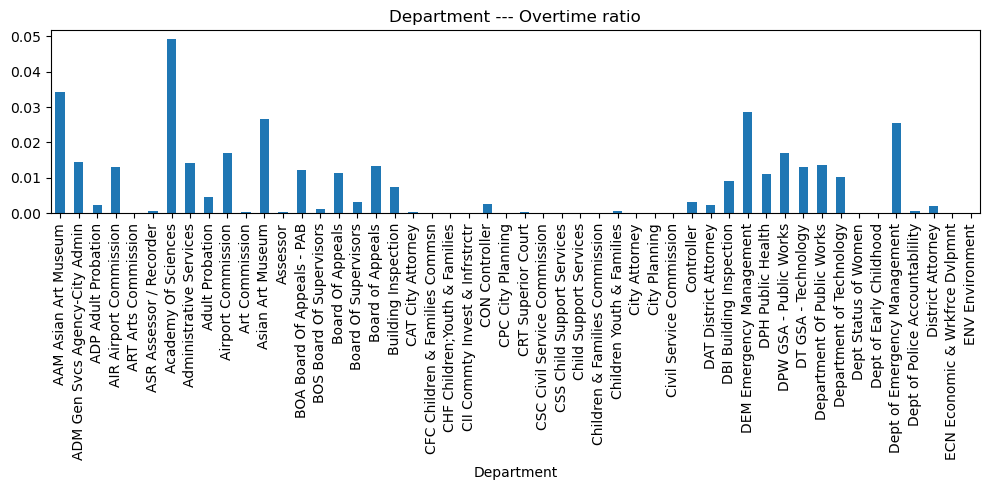

In [129]:
df2=round(data.groupby('Department')[['Salaries','Overtime','Total Salary']].mean(),2)[:50]
df2['overtime_ratio']=df2.Overtime/df2['Total Salary']
df1=df1.sort_values(by='overtime_ratio')
df2['overtime_ratio'].plot(kind='bar',figsize=(10,5))
plt.title('Department --- Overtime ratio')
plt.tight_layout()

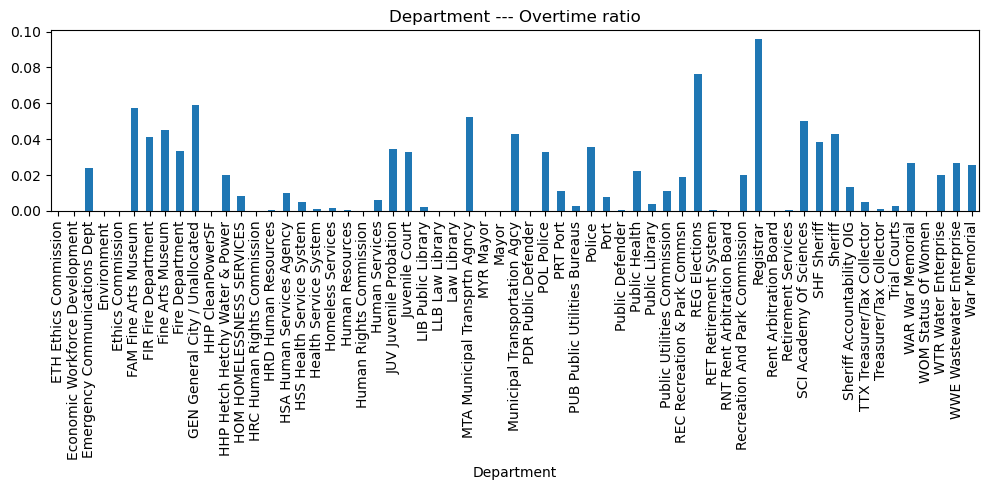

In [111]:
df2=round(data.groupby('Department')[['Salaries','Overtime','Total Salary']].mean(),2)[50:]
df2['overtime_ratio']=df2.Overtime/df2['Total Salary']
df2['overtime_ratio'].plot(kind='bar',figsize=(10,5))
plt.title('Department --- Overtime ratio')
plt.tight_layout()

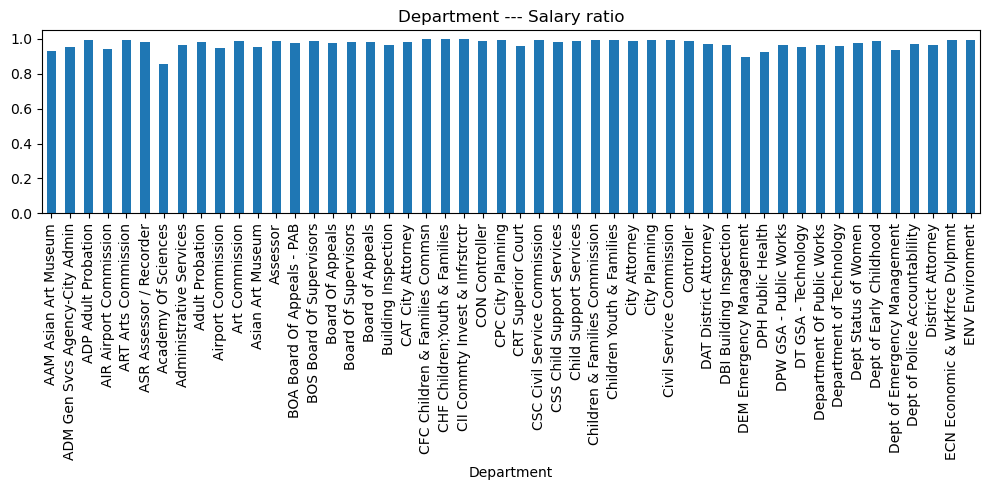

In [112]:
df2=round(data.groupby('Department')[['Salaries','Overtime','Total Salary']].mean(),2)[:50]
df2['salary_ratio']=df2.Salaries/df2['Total Salary']
df2['salary_ratio'].plot(kind='bar',figsize=(10,5))
plt.title('Department --- Salary ratio')
plt.tight_layout()

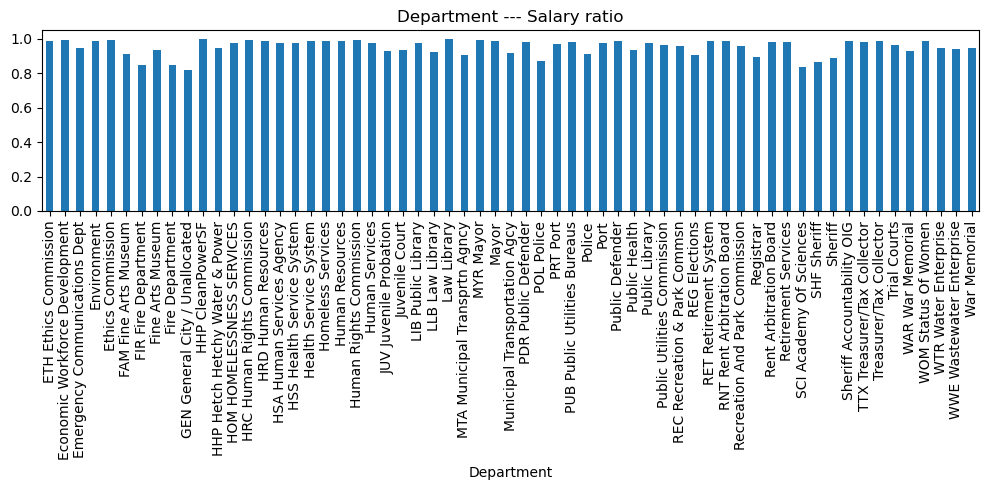

In [113]:
df2=round(data.groupby('Department')[['Salaries','Overtime','Total Salary']].mean(),2)[50:]
df2['salary_ratio']=df2.Salaries/df2['Total Salary']
df2['salary_ratio'].plot(kind='bar',figsize=(10,5))
plt.title('Department --- Salary ratio')
plt.tight_layout()

Conclusion:Job Family - Administrative Secretrial has the highest overtime ratio where as in department Academy in science 
has the highest overtime ratio and for Salary ratio it is almost same for all departments and job family with little variation.

## 5.Explore the distribution of benefits across different organization groups and unions to understand the variations in benefit packages provided to employees.

C:\Users\Futurense\AppData\Local\Temp\ipykernel_9132\1378733021.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=data.groupby(['Organization Group'])['Retirement','Health and Dental','Other Benefits'].mean().plot(kind='bar')


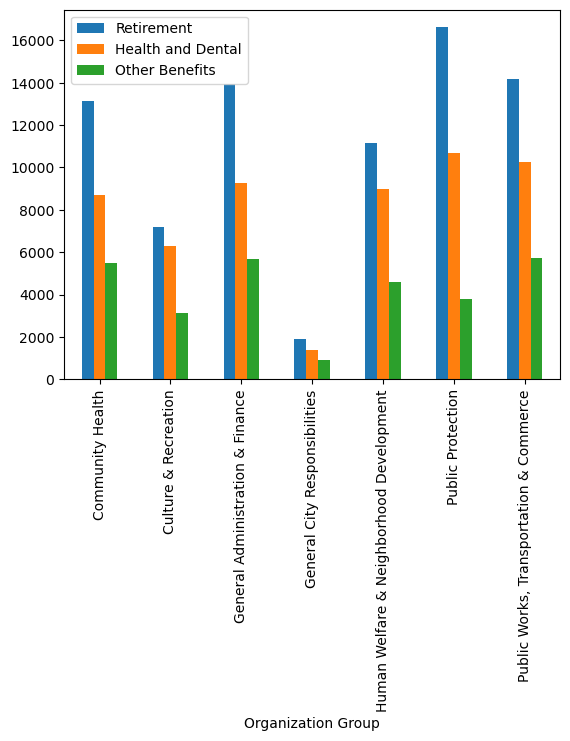

In [83]:
df2=data.groupby(['Organization Group'])['Retirement','Health and Dental','Other Benefits'].mean().plot(kind='bar')

C:\Users\Futurense\AppData\Local\Temp\ipykernel_9132\972657476.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Union')['Retirement','Health and Dental','Other Benefits'].mean()[:55].plot(kind='bar',figsize=(15,5))


<Axes: xlabel='Union'>

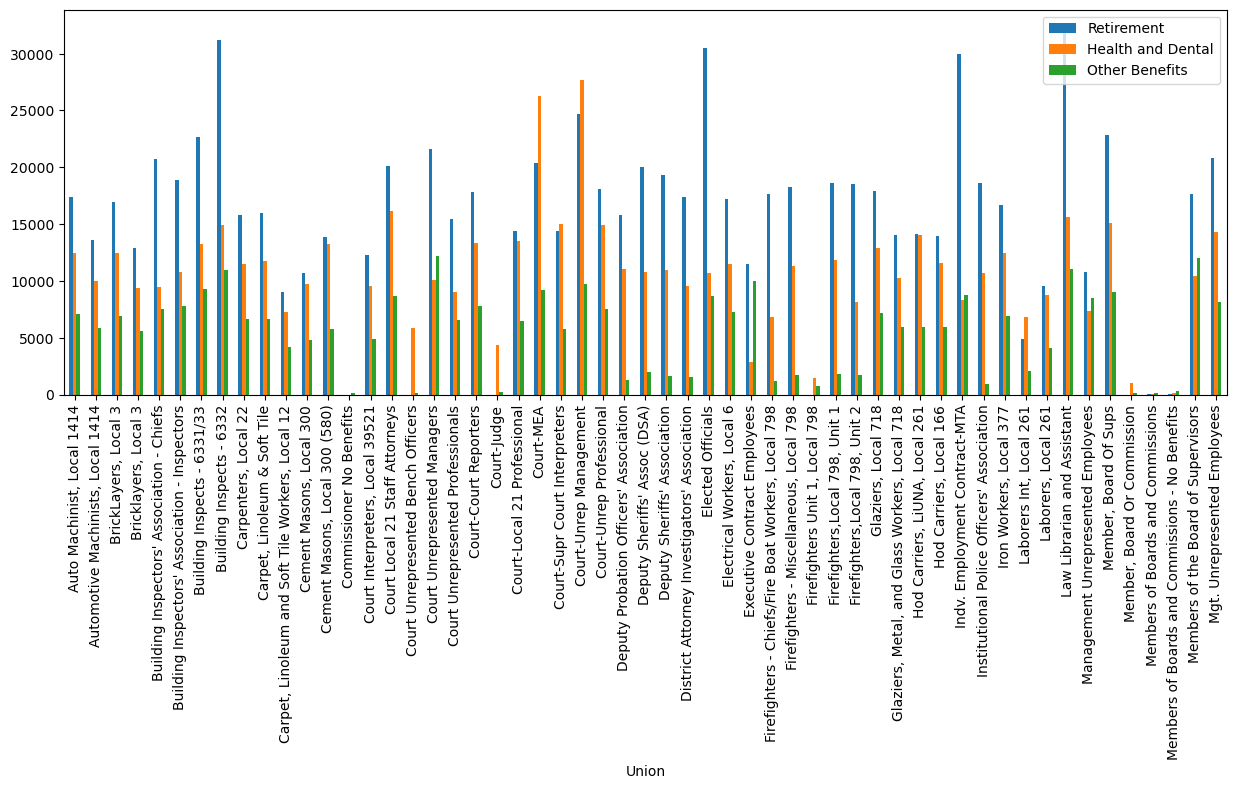

In [84]:
data.groupby('Union')['Retirement','Health and Dental','Other Benefits'].mean()[:55].plot(kind='bar',figsize=(15,5))

C:\Users\Futurense\AppData\Local\Temp\ipykernel_9132\3157191144.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Union')['Retirement','Health and Dental','Other Benefits'].mean()[55:].plot(kind='bar',figsize=(15,5))


<Axes: xlabel='Union'>

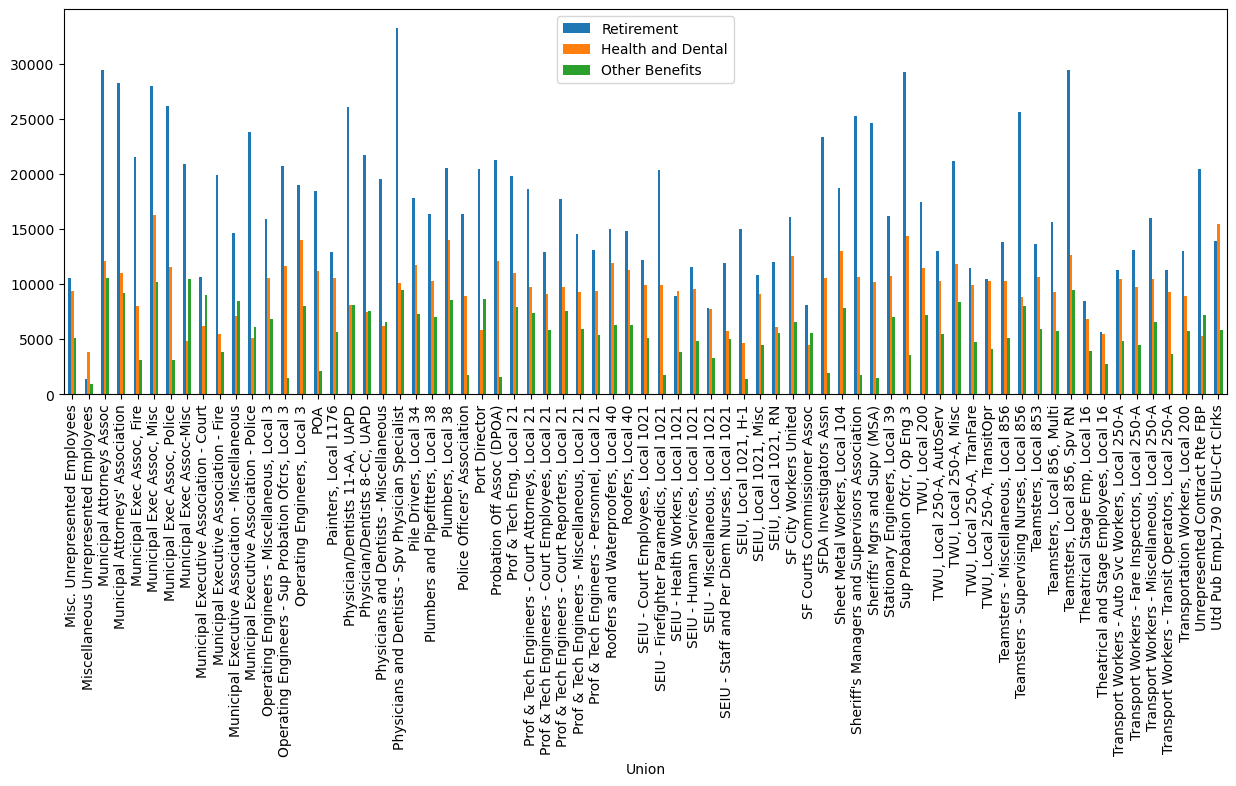

In [85]:
data.groupby('Union')['Retirement','Health and Dental','Other Benefits'].mean()[55:].plot(kind='bar',figsize=(15,5))

Conclusion:Public protection -Organization group has the highest mean total benefit and the Law library union is the highest 
and commissioner no benefits has the lowest mean total benefit.

## 6.Investigate the impact of job family on compensation levels and identify the job families with the highest and lowest average total compensation.

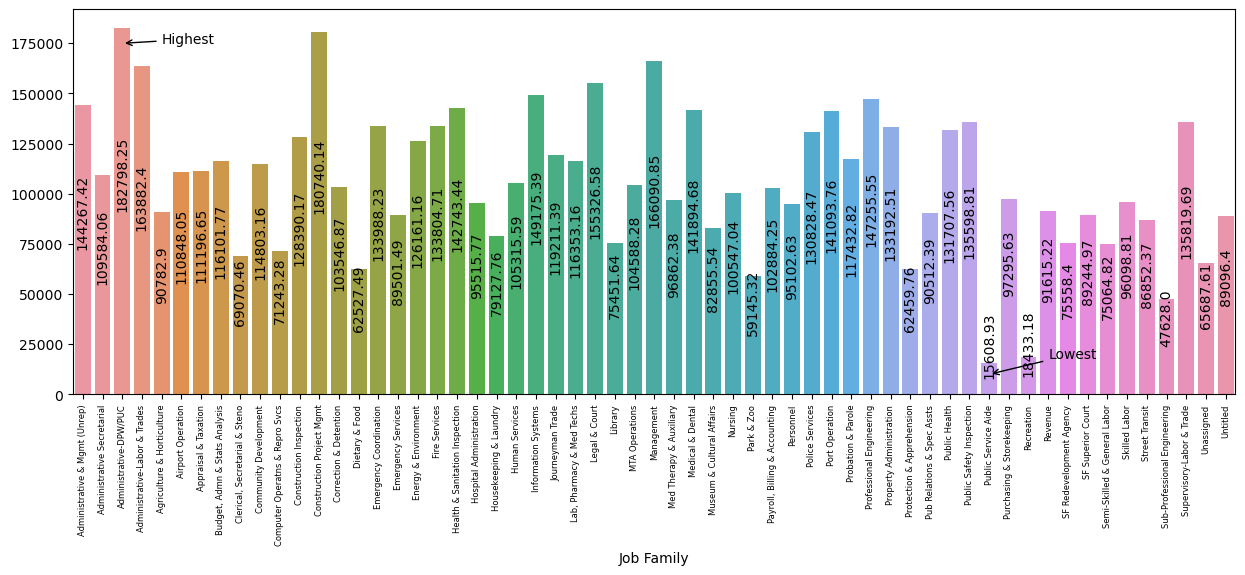

In [86]:
fig,ax=plt.subplots(figsize=(15,5))
df1=data.groupby('Job Family')['Total Compensation'].mean()
ax=sns.barplot(x=df1.index,y=df1.values)
ax.set_xticklabels(df1.index,rotation=90,fontsize=6);
plt.annotate('Highest', xy=(2,175001), xytext=(4, 175001),arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Lowest', xy=(46,10000), xytext=(49,18000),arrowprops=dict(facecolor='black', arrowstyle='->'))
bar_count(ax)

Conclusion:Administrative -DPW/PUC has the highest average total compensation 
and Public Service Aide has the lowest average total compensation.

## 7.Analyze the proportion of benefits in total compensation and assess how it varies across different departments and job families.

In [87]:
data.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [88]:
ben1=data['Retirement'].mean()/data['Total Compensation'].mean()
ben2=data['Health and Dental'].mean()/data['Total Compensation'].mean()
ben3=data['Other Benefits'].mean()/data['Total Compensation'].mean()
ben4=data['Total Benefits']/data['Total Compensation']

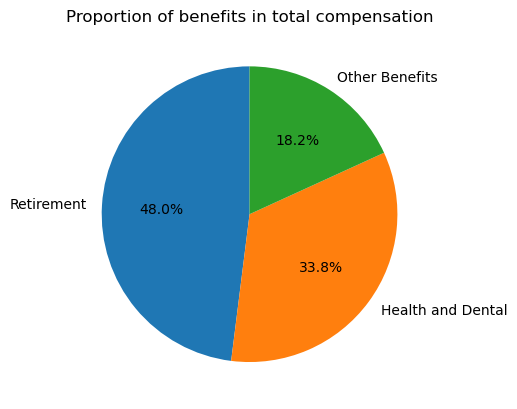

In [89]:
plt.pie([ben1,ben2,ben3],labels=['Retirement','Health and Dental','Other Benefits'], autopct='%1.1f%%', startangle=90);
plt.title('Proportion of benefits in total compensation');

In [90]:
data2=data[['Department','Job Family','Retirement','Health and Dental','Other Benefits','Total Benefits','Total Compensation']]

In [91]:
data2['Benefit_proportion']=data2['Total Benefits']/data2['Total Compensation']

C:\Users\Futurense\AppData\Local\Temp\ipykernel_9132\2545539668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Benefit_proportion']=data2['Total Benefits']/data2['Total Compensation']


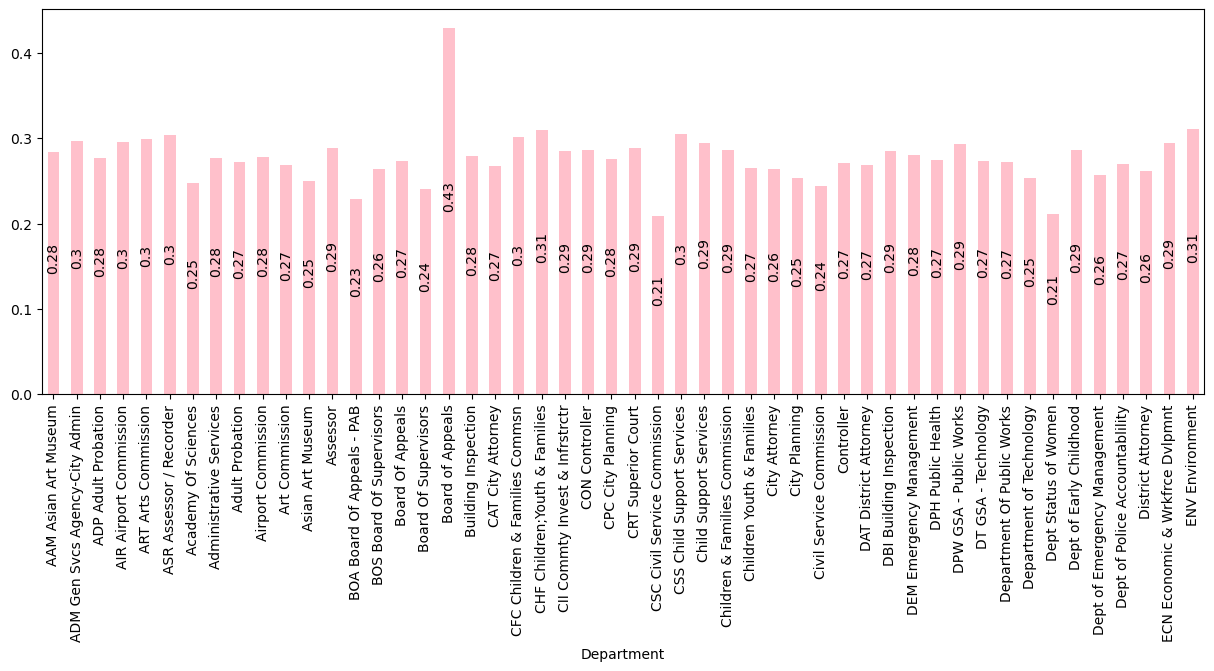

In [92]:
ax=data2.groupby('Department')['Benefit_proportion'].mean()[:50].plot(kind='bar',figsize=(15,5),color='pink')
bar_count(ax)

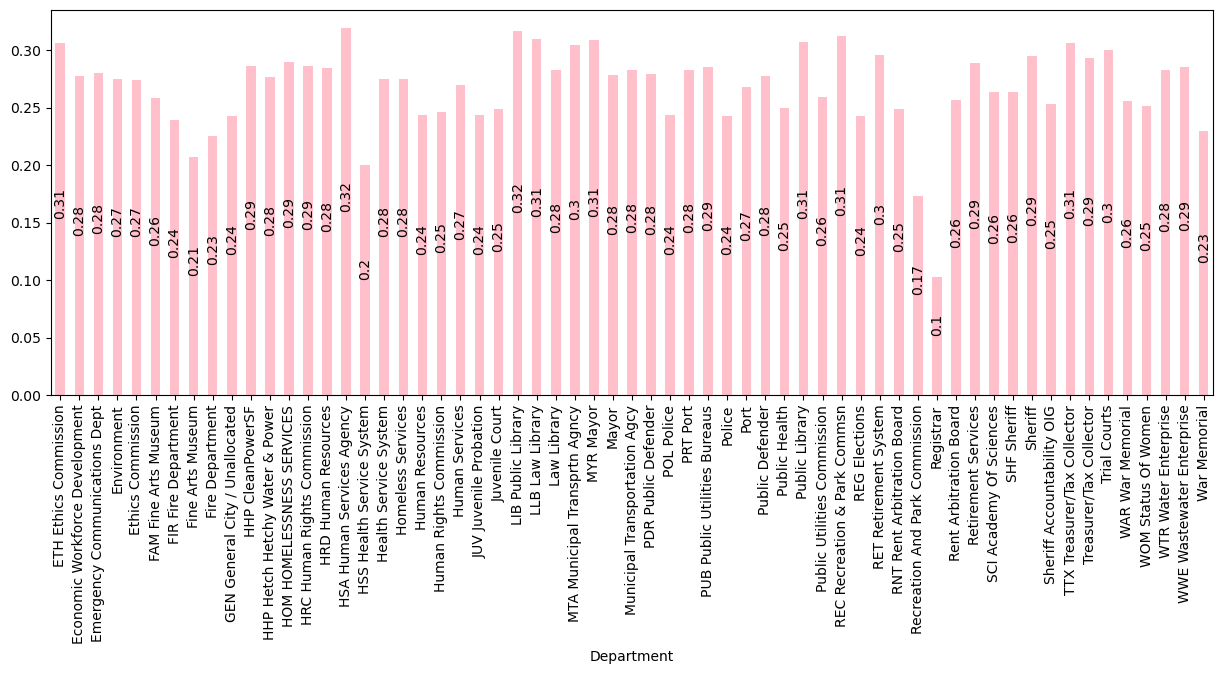

In [93]:
ax1=data2.groupby('Department')['Benefit_proportion'].mean()[50:].plot(kind='bar',figsize=(15,5),color='pink')
bar_count(ax1)

<Axes: xlabel='Job Family'>

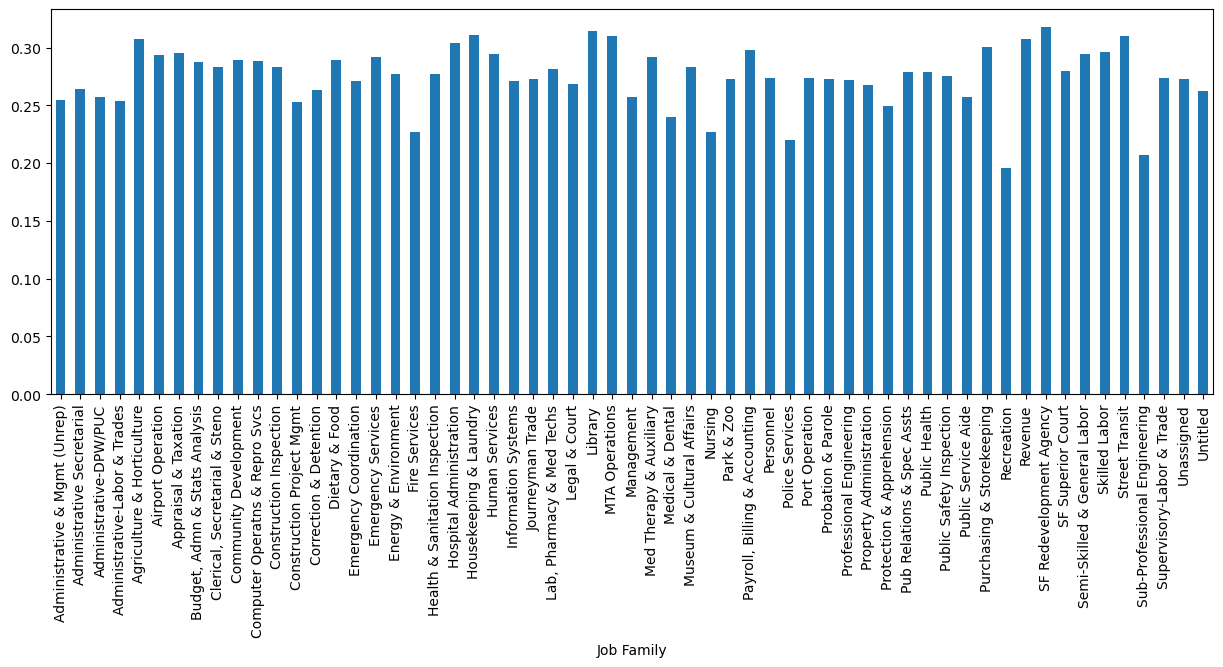

In [94]:
data2.groupby('Job Family')['Benefit_proportion'].mean().plot(kind='bar',figsize=(15,5))


Conclusion: Mostly 48% holds by retirement in total comoensation ,
board of appeals Department holds the top Benefited department , and its almost same for Job Family.

## 8. Identify any correlations between employee compensation and factors such as years of service, job level, or union affiliation.

In [95]:
df12=data[['Union Code','Total Compensation','Year']]

In [96]:
df12['Level']=2023-data['Year']

C:\Users\Futurense\AppData\Local\Temp\ipykernel_9132\2587807314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['Level']=2023-data['Year']


In [97]:
df12.corr()

Union Code  Total Compensation      Year     Level
Union Code            1.000000           -0.189503 -0.019944  0.019944
Total Compensation   -0.189503            1.000000  0.169841 -0.169841
Year                 -0.019944            0.169841  1.000000 -1.000000
Level                 0.019944           -0.169841 -1.000000  1.000000

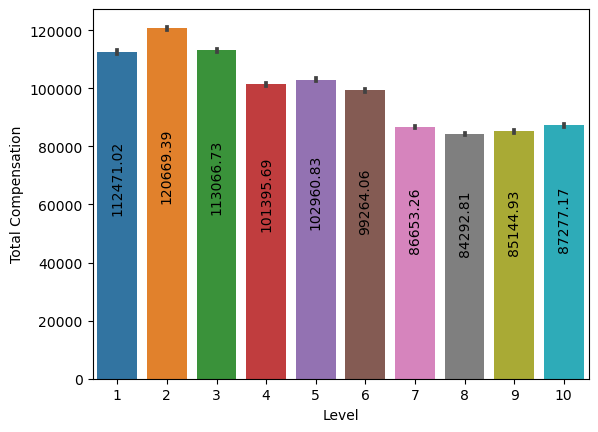

In [98]:
ax = sns.barplot(x=df12.Level ,y=df12['Total Compensation'])
bar_count(ax)

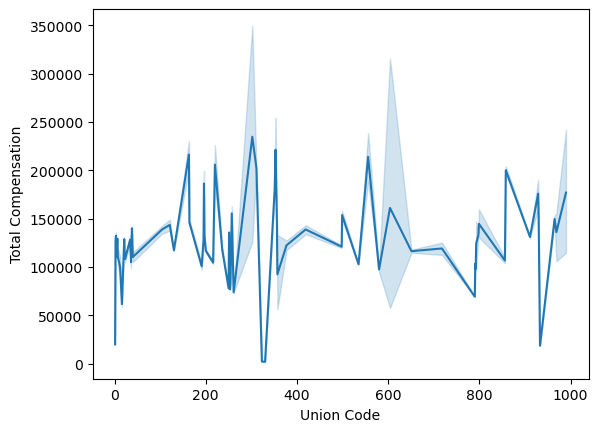

In [99]:
ax = sns.lineplot(x=df12['Union Code'] ,y=df12['Total Compensation'])

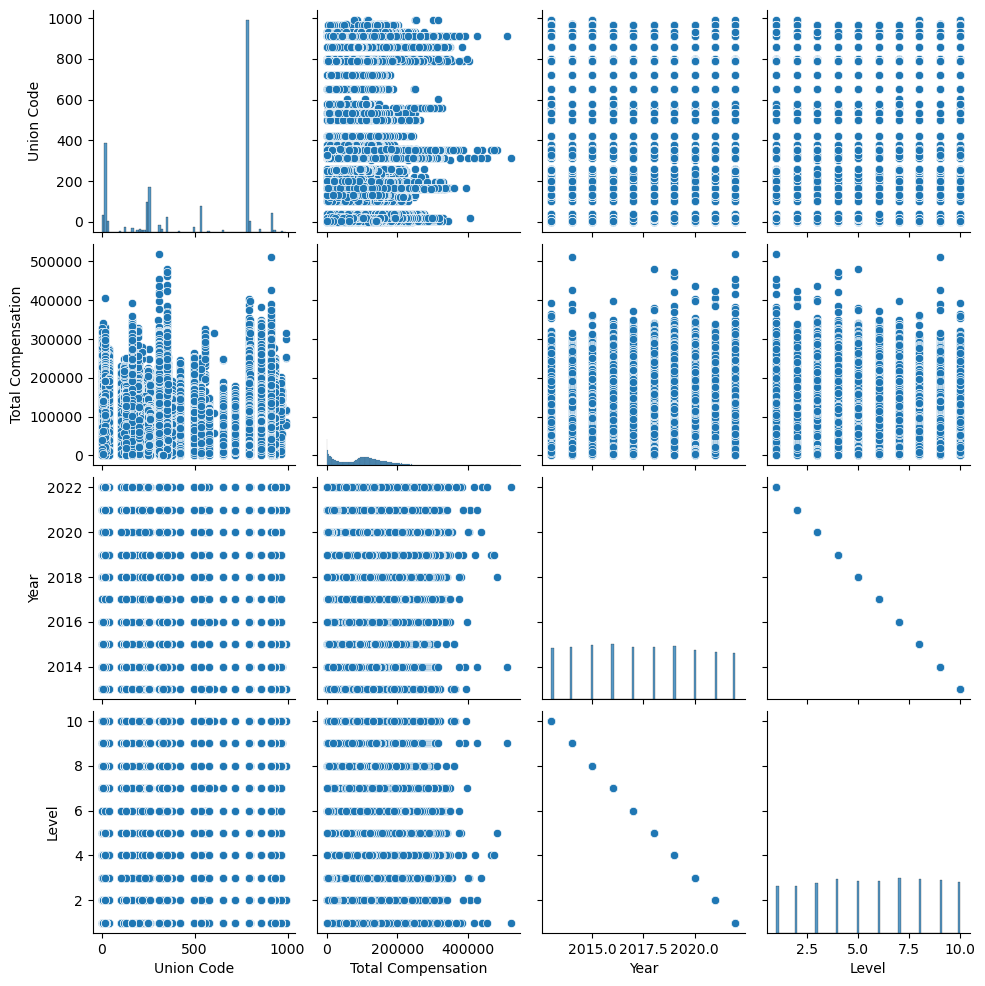

In [100]:
sns.pairplot(df12)

Conclusion: There is no correlation between union and total compensation but the total compensation decreases with 
increase in year level.

## 9. Assess the impact of retirement contributions and health/dental benefits on total compensation and explore any variations across departments or job families.

In [101]:
ben1=data['Retirement'].mean()/data['Total Compensation'].mean()
ben2=data['Health and Dental'].mean()/data['Total Compensation'].mean()
ben4=data['Total Benefits']/data['Total Compensation']

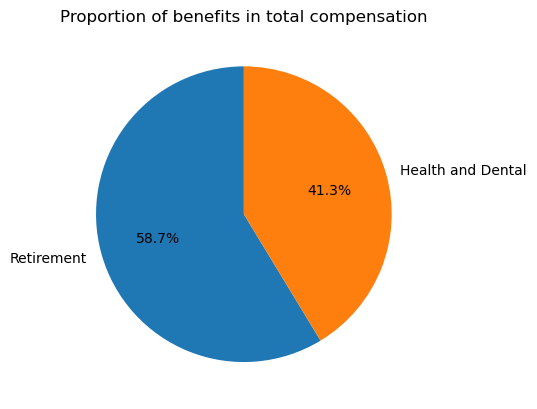

In [102]:
plt.pie([ben1,ben2],labels=['Retirement','Health and Dental'], autopct='%1.1f%%', startangle=90);
plt.title('Proportion of benefits in total compensation');

C:\Users\Futurense\AppData\Local\Temp\ipykernel_9132\781414921.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2.groupby('Department')['Retirement','Health and Dental'].mean()[:50].plot(kind='bar',figsize=(15,5))


<Axes: xlabel='Department'>

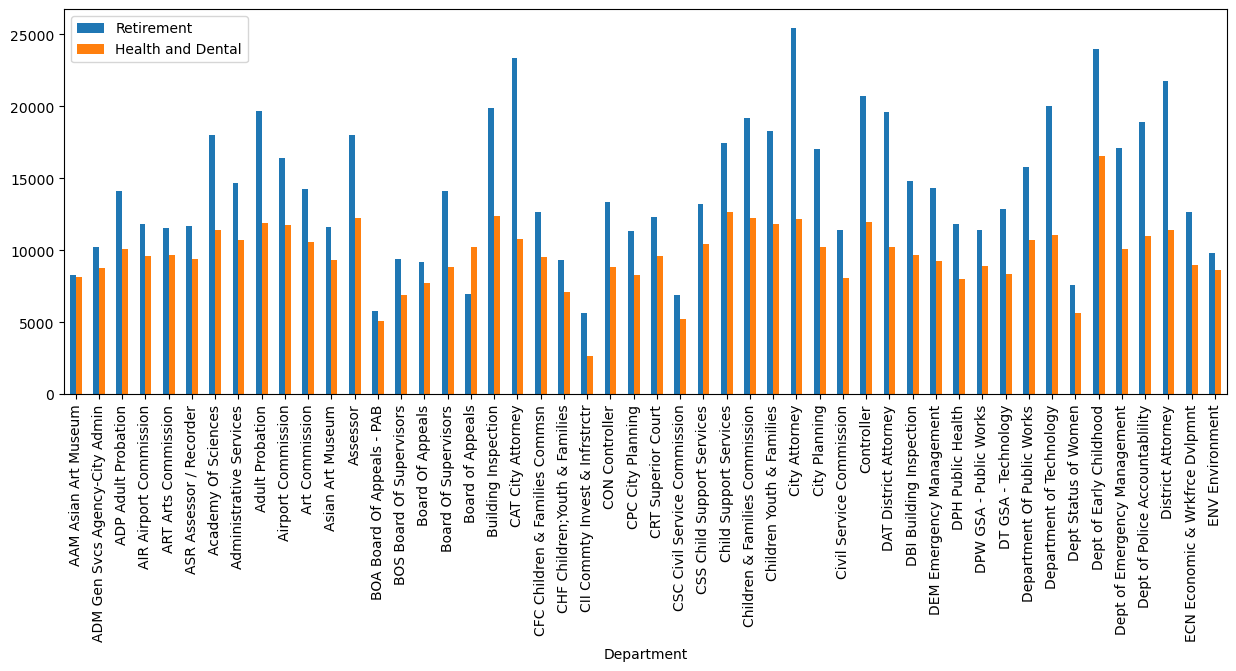

In [103]:
data2.groupby('Department')['Retirement','Health and Dental'].mean()[:50].plot(kind='bar',figsize=(15,5))


C:\Users\Futurense\AppData\Local\Temp\ipykernel_9132\2248617495.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2.groupby('Department')['Retirement','Health and Dental'].mean()[50:].plot(kind='bar',figsize=(15,5))


<Axes: xlabel='Department'>

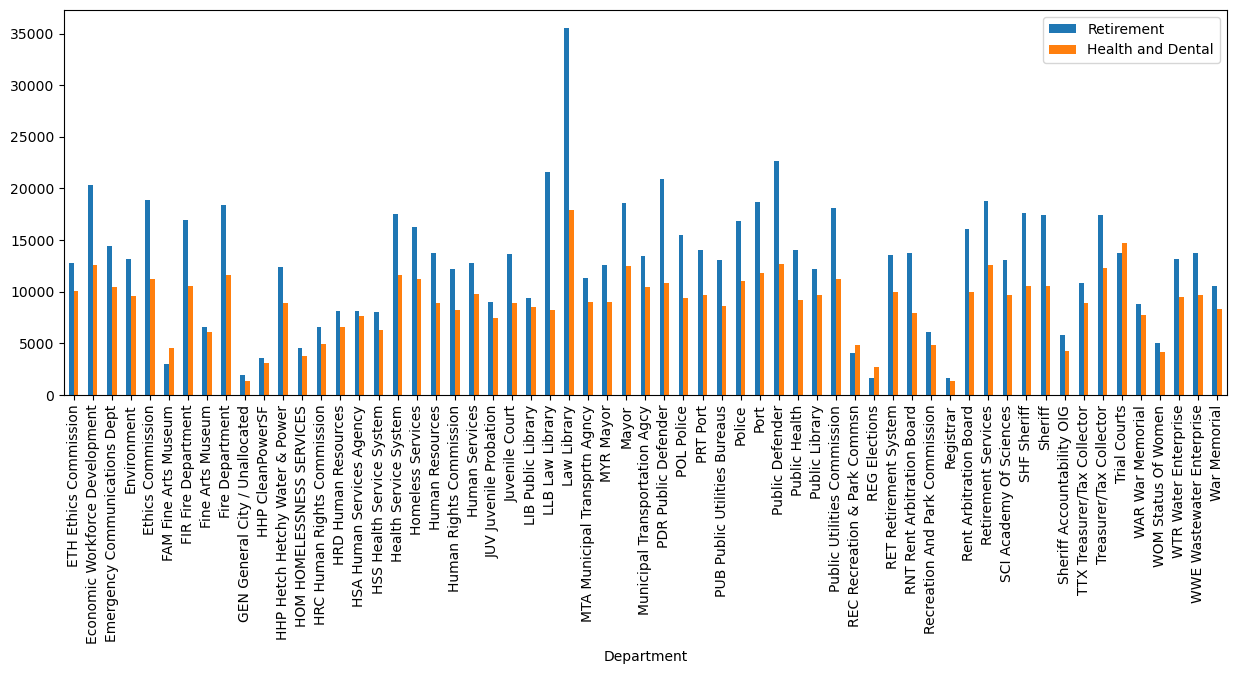

In [104]:
data2.groupby('Department')['Retirement','Health and Dental'].mean()[50:].plot(kind='bar',figsize=(15,5))


C:\Users\Futurense\AppData\Local\Temp\ipykernel_9132\3953811566.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2.groupby('Job Family')['Retirement','Health and Dental'].mean().plot(kind='bar',figsize=(15,5))


<Axes: xlabel='Job Family'>

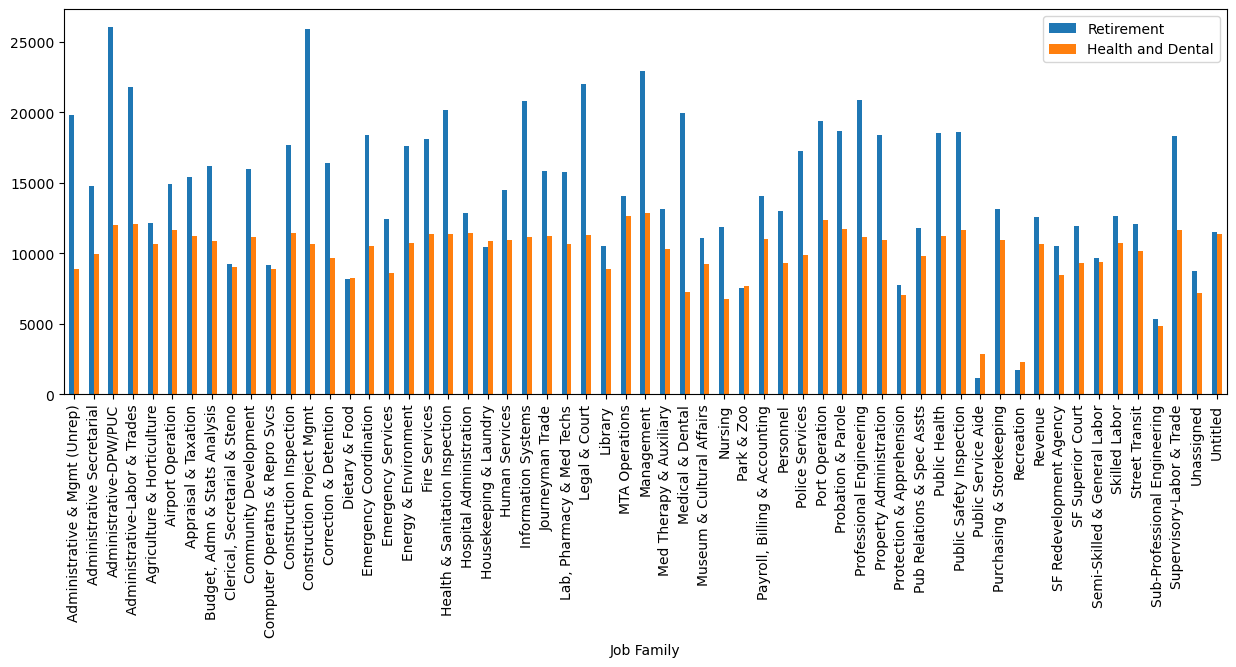

In [105]:
data2.groupby('Job Family')['Retirement','Health and Dental'].mean().plot(kind='bar',figsize=(15,5))


Conclusion:Law library has mostly benefited in department and Administrative-DPW/PUC in Job Family

## 10 . Analyze which department Clerk takes maximum salary. Display Top 5 Departments which pays maximum salary to clerk.

In [106]:
df1=data[data['Job']=='Clerk']

In [107]:
pivot=pd.pivot_table(data=df1,index='Department',columns='Job',values='Salaries',aggfunc='max')

In [108]:
clerk = df1.groupby('Department')['Salaries'].mean().sort_values(ascending=False).head(5)

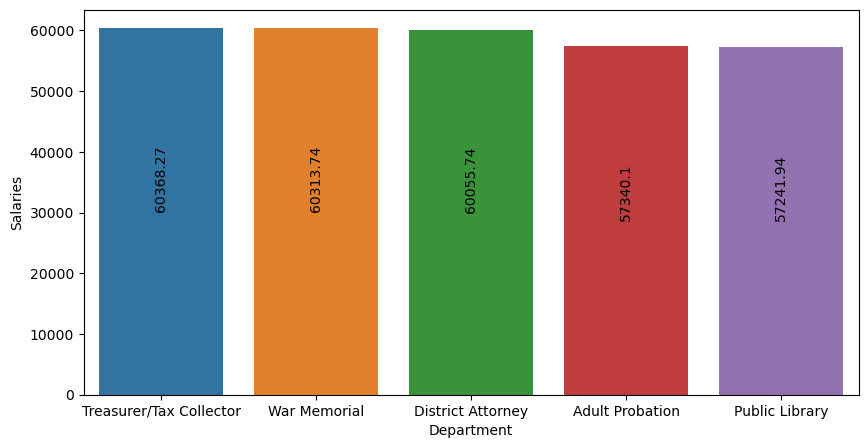

In [109]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(x=clerk.index,y=clerk)
bar_count(ax)

Conclusion:So these are the top 5 departments that provide maximum salary to clerk.